In [2]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from yellowbrick.regressor import ResidualsPlot
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'yellowbrick'

In [4]:
data = pd.read_csv('Train.csv')

In [214]:
data['investment_4'].describe()

count    14466.000000
mean      3519.800692
std       7386.243032
min     -12179.000000
25%          0.000000
50%       2351.000000
75%       6885.000000
max      35346.000000
Name: investment_4, dtype: float64

([<matplotlib.patches.Wedge at 0x640dfd7240>,
 [Text(-0.9776902445537761, 0.504104935211289, 'Current account %'),
  Text(0.977690291751482, -0.5041048436733199, 'Savings account %')],
 [Text(-0.5332855879384233, 0.27496632829706663, '84.85'),
  Text(0.5332856136826265, -0.27496627836726534, '15.15')])

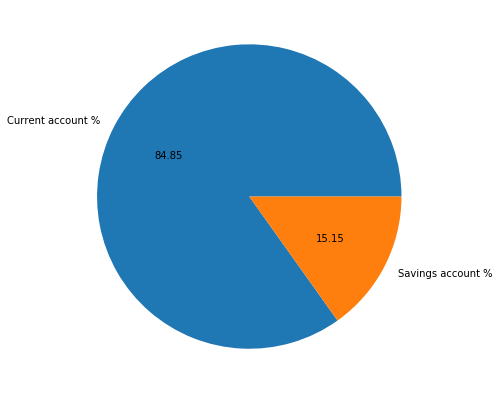

In [153]:
acc_type = data['account_type'].value_counts()
labels_acc = 'Current account %', 'Savings account %'
plt.figure(figsize=(12,7))
plt.pie(acc_type, labels = labels_acc, autopct='%1.2f')

### The bank has more number of current accounts as compared to savings accounts

([<matplotlib.patches.Wedge at 0x641152a978>,
 [Text(-0.9996796155276638, 0.45895606140289985, 'Male %'),
  Text(0.9996795725570915, -0.4589561549996589, 'Female %')],
 [Text(-0.5452797902878166, 0.25033966985612716, '86.30'),
  Text(0.5452797668493226, -0.25033972090890483, '13.70')])

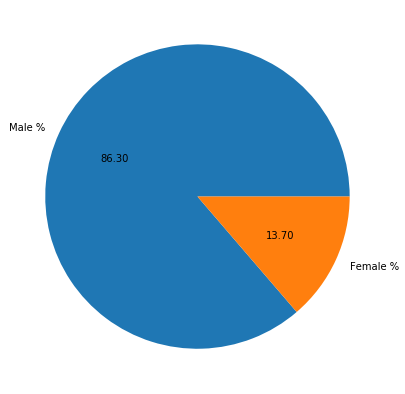

In [154]:
gender_type = data['gender'].value_counts()
labels_acc = 'Male %', 'Female %'
plt.figure(figsize=(12,7))
plt.pie(gender_type, labels = labels_acc, autopct='%1.2f')

### The bank has more number of male customers

In [155]:
#credit and debit cart total amount consumption for the months of April, May and June
cols = ['cc_cons_apr','cc_cons_may','cc_cons_jun','dc_cons_apr','dc_cons_may','dc_cons_jun']

cols_df = data[cols].sum()
cc_monthwise = {'April': cols_df['cc_cons_apr'], 'May': cols_df['cc_cons_may'], 'June': cols_df['cc_cons_jun']}
dc_monthwise = {'April': cols_df['dc_cons_apr'], 'May': cols_df['dc_cons_may'], 'June': cols_df['dc_cons_jun']}

In [156]:
data['dc_cons_apr'].sum()

122566474.30000001

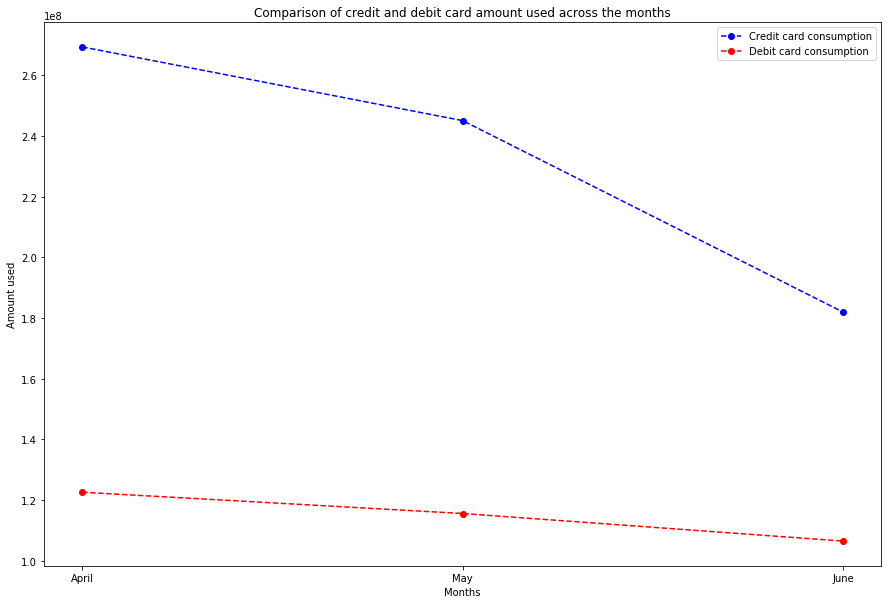

In [157]:
lists = cc_monthwise.items() 
plt.figure(figsize=(15,10))
x, y = zip(*lists)

plt.plot(x, y, color='blue', marker='o', linestyle='--', label='Credit card consumption')

lists = dc_monthwise.items() 
x, y = zip(*lists)
plt.plot(x, y, color='red', marker='o', linestyle='--', label='Debit card consumption')
plt.title("Comparison of credit and debit card amount used across the months")
plt.xlabel("Months")
plt.ylabel("Amount used")
plt.legend()
plt.show()

### Amount of credit card used is far greater than the amount of debit card. There is downward trend in both type of cards.

In [158]:
#credit and debit cart total transactions for the months of April, May and June
cols = ['cc_count_apr','cc_count_may','cc_count_jun','dc_count_apr','dc_count_may','dc_count_jun']

cols_df = data[cols].sum()
cc_monthwise_count = {'April': cols_df['cc_count_apr'], 'May': cols_df['cc_count_may'], 'June': cols_df['cc_count_jun']}
dc_monthwise_count = {'April': cols_df['dc_count_apr'], 'May': cols_df['dc_count_may'], 'June': cols_df['dc_count_jun']}

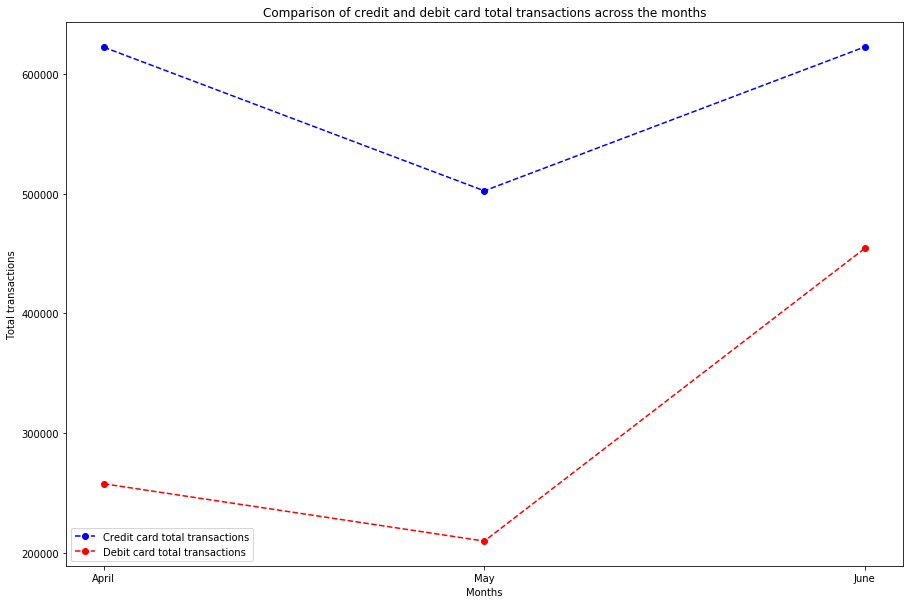

In [159]:
lists = cc_monthwise_count.items() 
plt.figure(figsize=(15,10))
x, y = zip(*lists)

plt.plot(x, y, color='blue', marker='o', linestyle='--', label='Credit card total transactions')

lists = dc_monthwise_count.items() 
x, y = zip(*lists)
plt.plot(x, y, color='red', marker='o', linestyle='--', label='Debit card total transactions')
plt.title("Comparison of credit and debit card total transactions across the months")
plt.xlabel("Months")
plt.ylabel("Total transactions")
plt.legend()
plt.show()

# Both credit and debit card transactions increased in the month of June. We observed earlier that the total amount used has decreased for both card types. Amount decreased and transactions increased...can we infer that more transactions with smaller amount occured in the month of  June?

### We have not considered analysing using the ratio of amount spent and number of transactions because consider the scenario where a customer makes a transaction of 10,000 rupees and the next 2 transactions are only of 1000 rupees. So the average transaction amount comes out to be 4000 rupees which can be misleading

In [160]:
#total number of times amount were debited/credited in account for the months of April, May and June
cols = ['debit_count_apr','debit_count_may','debit_count_jun','credit_count_apr','credit_count_may','credit_count_jun']

cols_df = data[cols].sum()
monthwise_debit = {'April': cols_df['debit_count_apr'], 'May': cols_df['debit_count_may'], 'June': cols_df['debit_count_jun']}
monthwise_credit = {'April': cols_df['credit_count_apr'], 'May': cols_df['credit_count_may'], 'June': cols_df['credit_count_jun']}

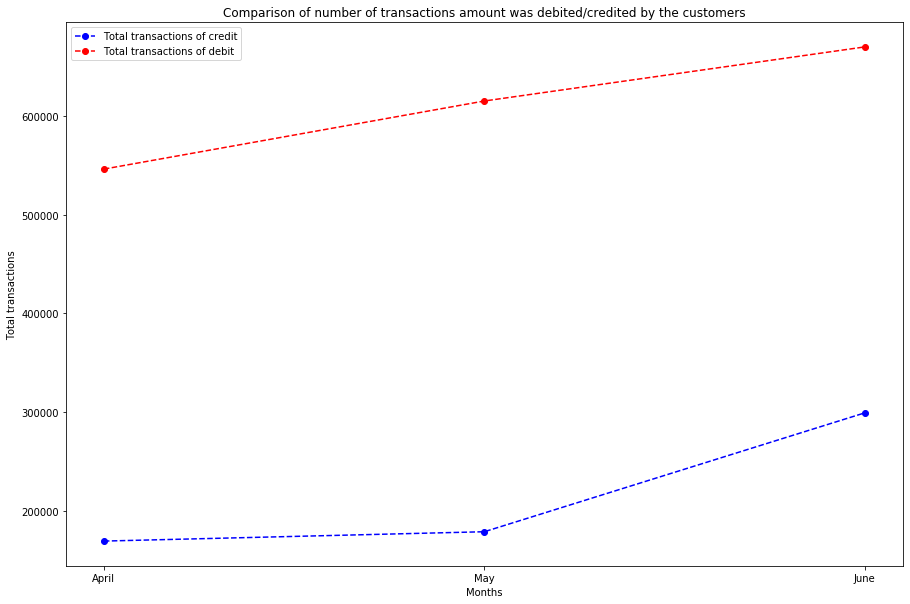

In [161]:
lists = monthwise_credit.items() 
plt.figure(figsize=(15,10))
x, y = zip(*lists)

plt.plot(x, y, color='blue', marker='o', linestyle='--', label='Total transactions of credit')

lists = monthwise_debit.items() 
x, y = zip(*lists)
plt.plot(x, y, color='red', marker='o', linestyle='--', label='Total transactions of debit')
plt.title("Comparison of number of transactions amount was debited/credited by the customers")
plt.xlabel("Months")
plt.ylabel("Total transactions")
plt.legend()
plt.show()

In [162]:
#total amount debited/credited in account for the months of April, May and June
cols = ['credit_amount_apr','credit_amount_may','credit_amount_jun','debit_amount_apr','debit_amount_may','debit_amount_jun']

cols_df = data[cols].sum()
monthwise_debit_amt = {'April': cols_df['debit_amount_apr'], 'May': cols_df['debit_amount_may'], 'June': cols_df['debit_amount_jun']}
monthwise_credit_amt = {'April': cols_df['credit_amount_apr'], 'May': cols_df['credit_amount_may'], 'June': cols_df['credit_amount_jun']}

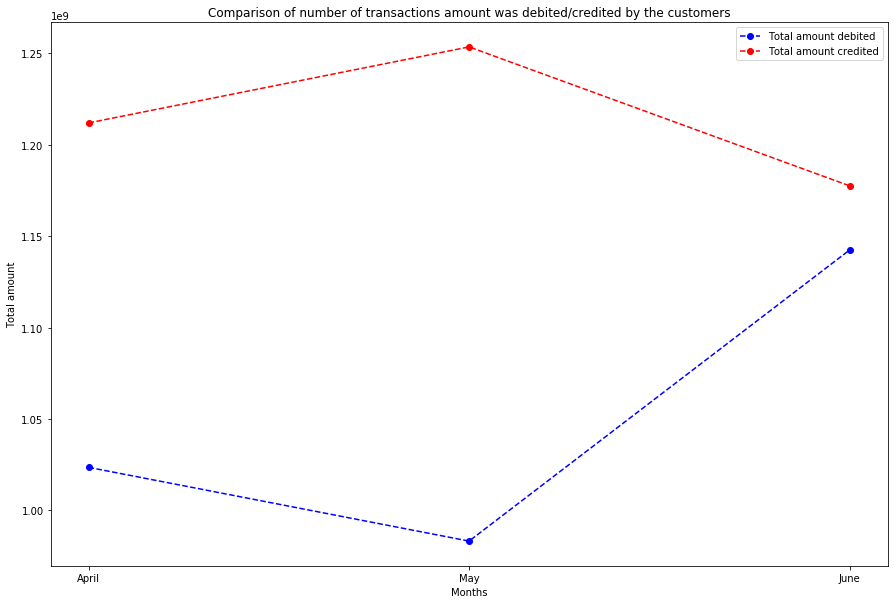

In [163]:
lists = monthwise_debit_amt.items() 
plt.figure(figsize=(15,10))
x, y = zip(*lists)

plt.plot(x, y, color='blue', marker='o', linestyle='--', label='Total amount debited')

lists = monthwise_credit_amt.items() 
x, y = zip(*lists)
plt.plot(x, y, color='red', marker='o', linestyle='--', label='Total amount credited')
plt.title("Comparison of number of transactions amount was debited/credited by the customers")
plt.xlabel("Months")
plt.ylabel("Total amount")
plt.legend()
plt.show()

### We can observe that the amount being debited has increased in the month of June and also the amount being credited has decreased. This is a negative sign as the amount going out is more than the amount coming in. Bank should keep a track on this for the coming months

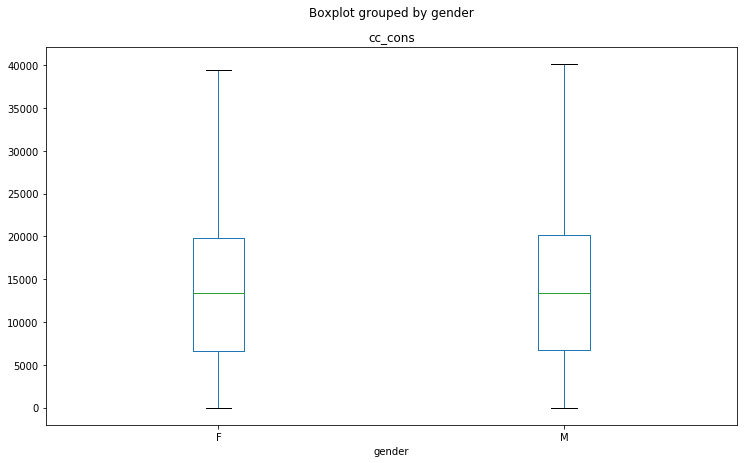

In [164]:
data.boxplot(by ='gender', column =['cc_cons'], grid = False,showfliers=False, figsize=(12,7))

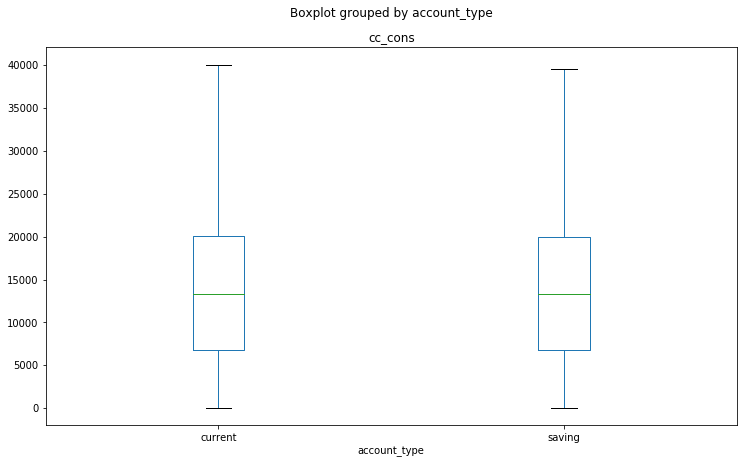

In [165]:
data.boxplot(by ='account_type', column =['cc_cons'], grid = False, showfliers=False, figsize=(12,7))

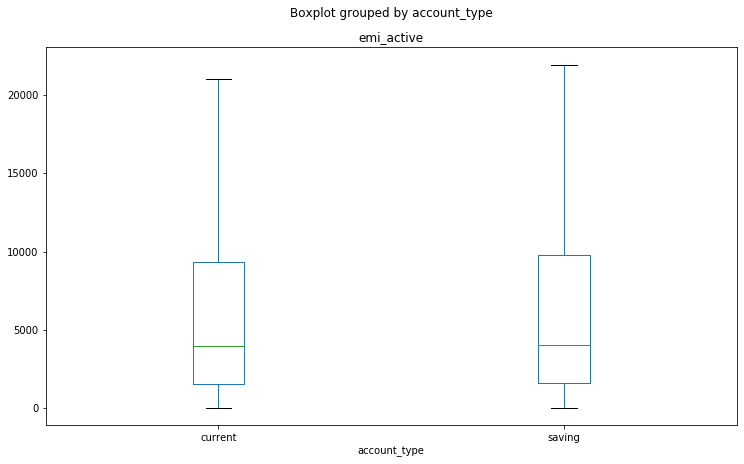

In [166]:
data.boxplot(by ='account_type', column =['emi_active'], grid = False, showfliers=False, figsize=(12,7))

### There is no effect of account type and the montly emi paid to other banks per month

In [167]:
#taking average of credit card consumption of previous 3 months
data['previous_cc'] = (data['cc_cons_apr'] + data['cc_cons_may'] + data['cc_cons_jun'])/3

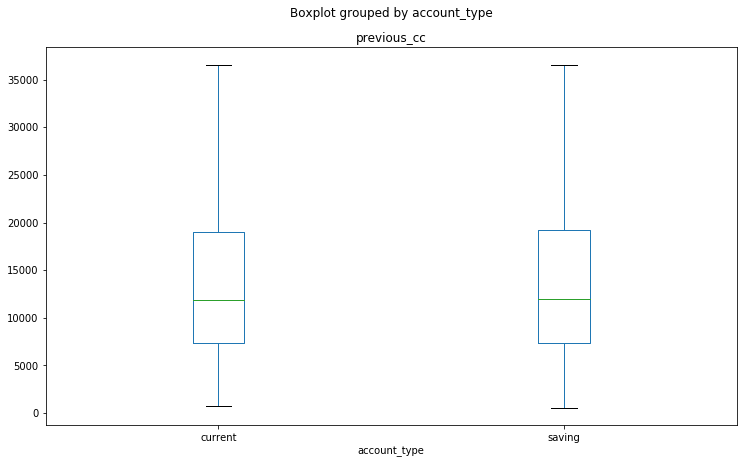

In [168]:
data.boxplot(by ='account_type', column =['previous_cc'], grid = False, showfliers=False, figsize=(12,7))

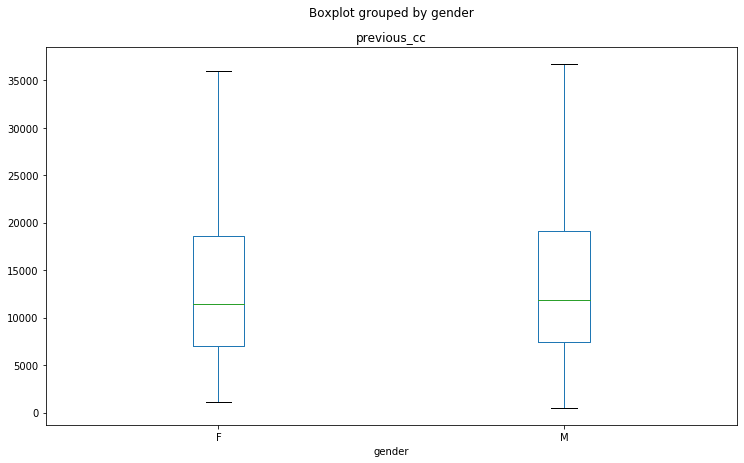

In [169]:
data.boxplot(by ='gender', column =['previous_cc'], grid = False, showfliers=False, figsize=(12,7))

### The average consumption of credit card and debit card is not affected by account type and gender

In [170]:
data['previous_dc'] = (data['dc_cons_apr'] + data['dc_cons_may'] + data['dc_cons_jun'])/3

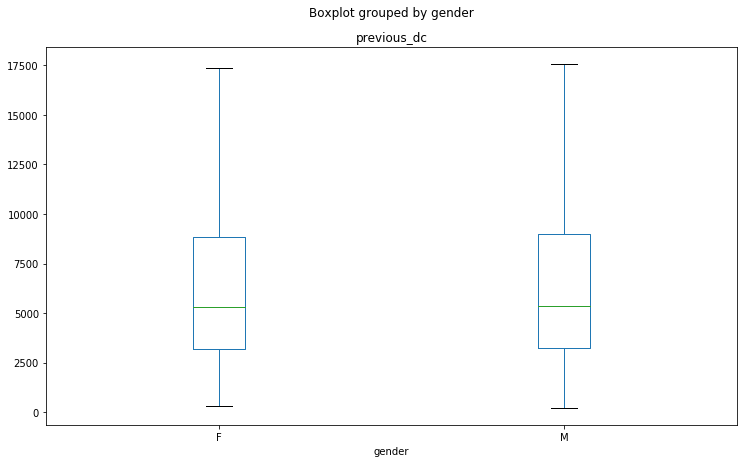

In [171]:
data.boxplot(by ='gender', column =['previous_dc'], grid = False, showfliers=False, figsize=(12,7))

In [ ]:
data.boxplot(by ='gender', column =['previous_dc'], grid = False, showfliers=False, figsize=(12,7))

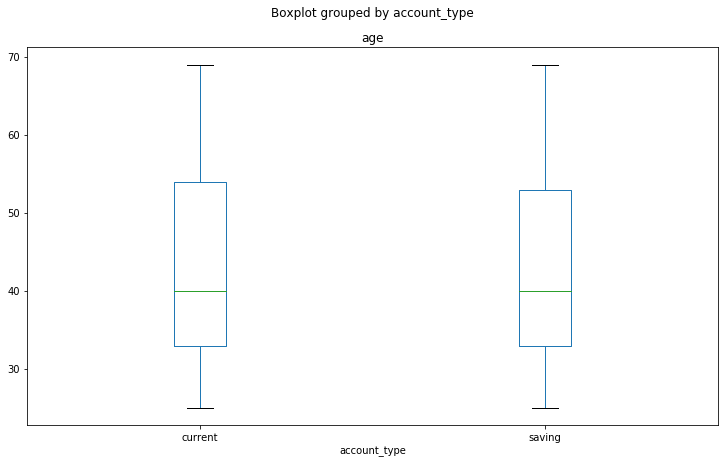

In [6]:
data.boxplot(by ='account_type', column =['age'], grid = False, showfliers=False, figsize=(12,7))

In [173]:
#function for dropping columns
def drop_col(df,col_list):
    for col in col_list:
        if col in df.columns:
            df.drop(col, axis = 1, inplace=True)
    return df

In [174]:
not_req = ['ID','region_code','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','loan_enq']

In [175]:
#removing unwanted columns 
data = drop_col(data, not_req)

In [176]:
#encoding categorical data using one hot encoding
data = pd.get_dummies(data=data, columns=['account_type', 'gender'])
data.head(5)

,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,previous_cc,previous_dc,account_type_current,account_type_saving,gender_F,gender_M
0,35,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26.0,10.0,...,65.0,50836.0,1674.09,20014.0,17157.466667,13824.666667,1,0,0,1
1,35,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7.0,13.0,...,63.0,23226.0,13043.34,10173.0,14610.206667,712.666667,1,0,0,1
2,55,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,102.0,...,1.0,27036.0,25375.27,16095.0,10533.206667,3941.703333,1,0,0,1
3,29,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1.0,50.0,...,83.0,43037.0,3544.33,7707.0,20206.793333,8008.146667,1,0,1,0
4,34,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,82.0,...,32.0,32044.0,12780.44,96408.0,4642.133333,5224.740000,1,0,0,1


In [177]:
cat_cols = ['account_type_current','account_type_saving','gender_F','gender_M']

In [178]:
numerical_data = data.drop(cat_cols, axis=1)
numerical_data.columns

Index(['age', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'cc_cons', 'previous_cc',
       'previous_dc'],
      dtype='object')

In [179]:
def plot_scatter(dataframe, target_col):
    plt.figure()
    for col in dataframe.columns:
        if col != target_col:
            plt.figure(figsize=(12,7))
            plt.scatter(x=dataframe[col], y=dataframe[target_col])
            plt.xlabel(col)
            plt.ylabel(target_col)

<Figure size 432x288 with 0 Axes>

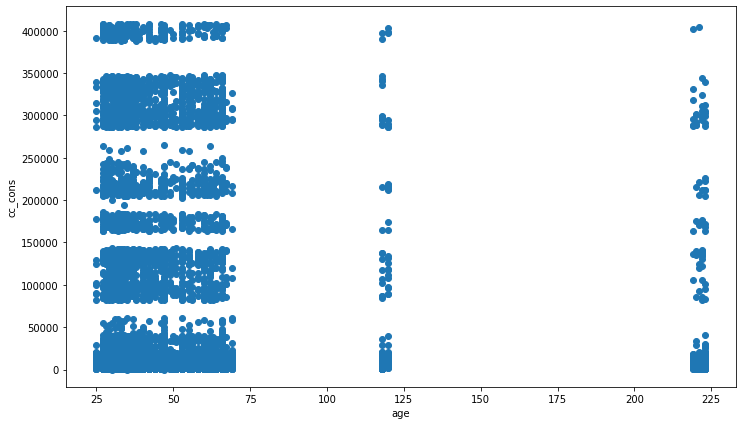

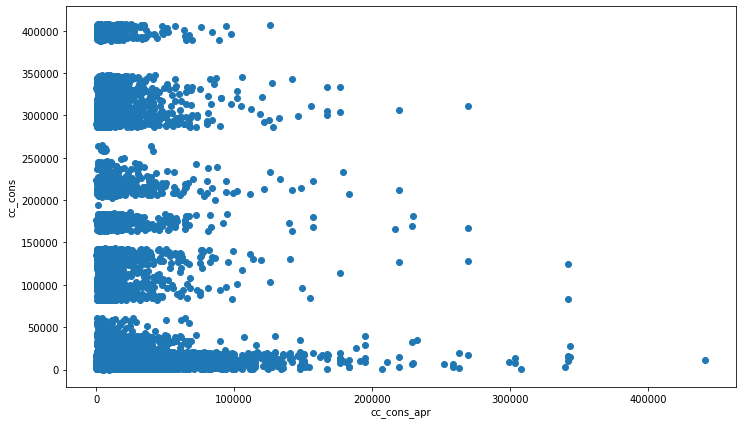

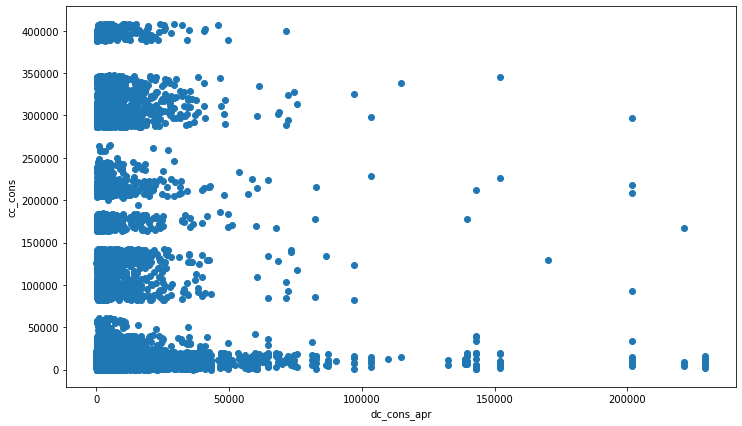

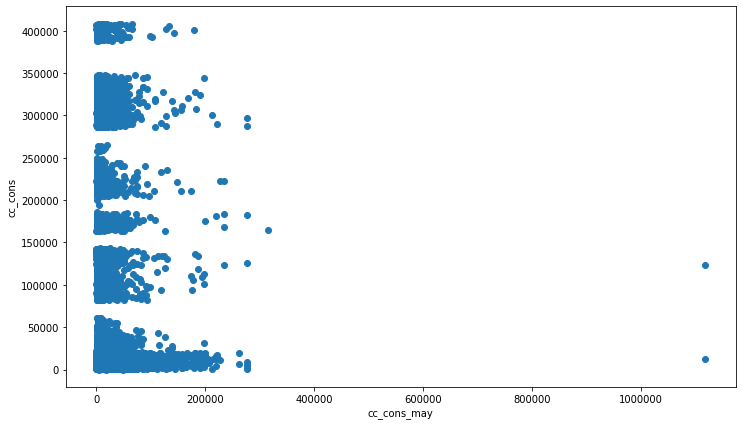

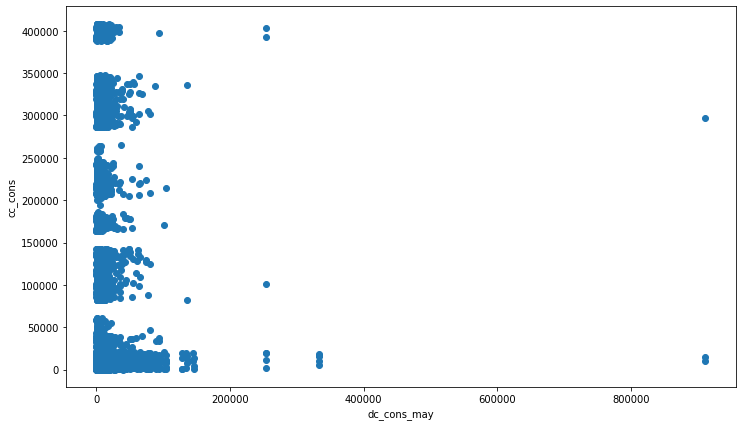

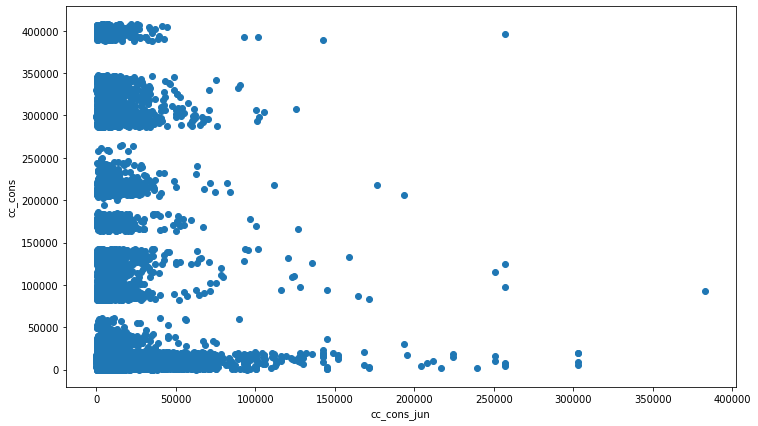

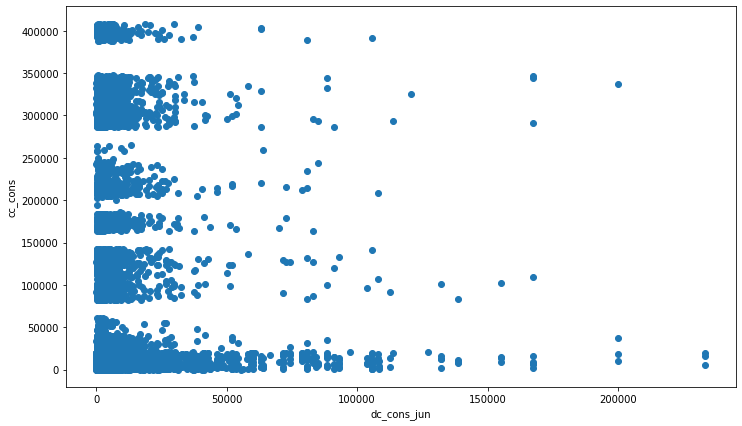

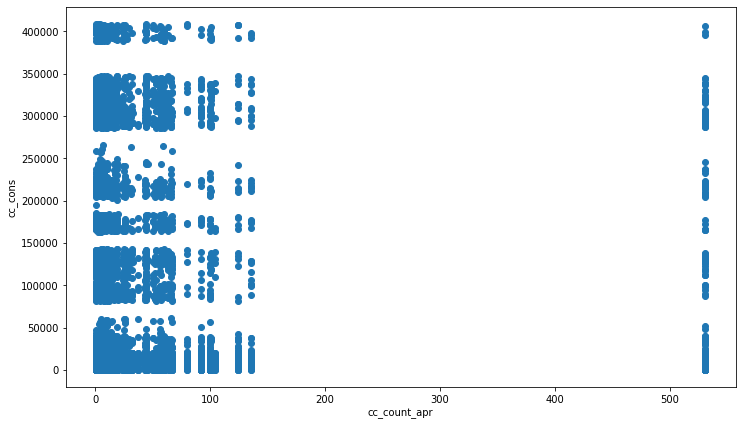

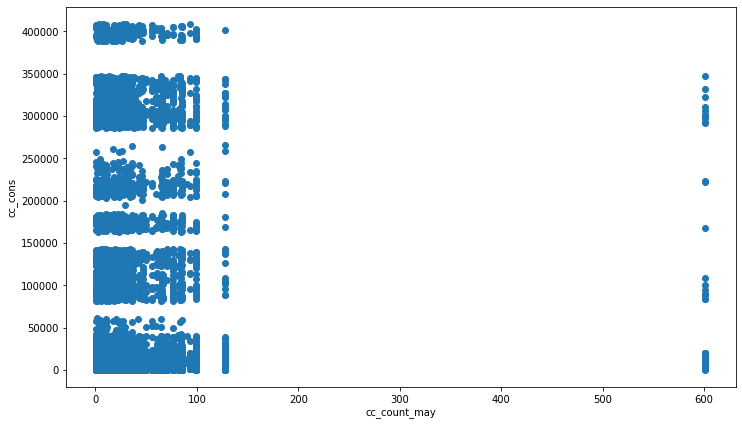

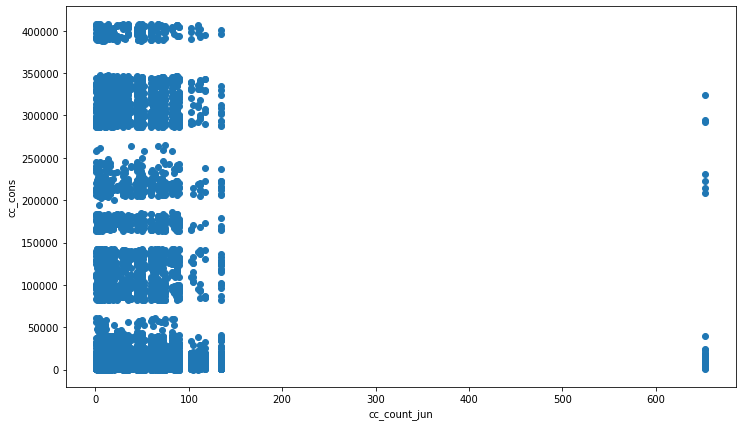

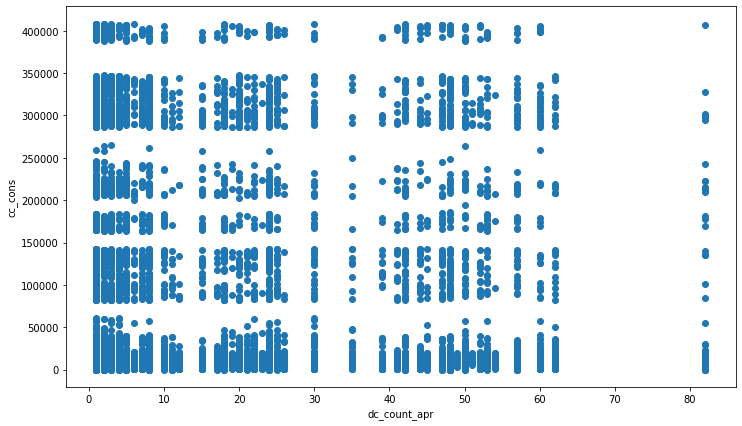

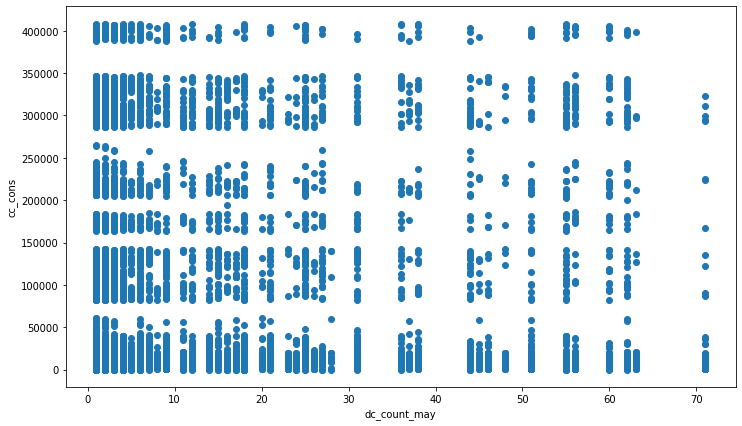

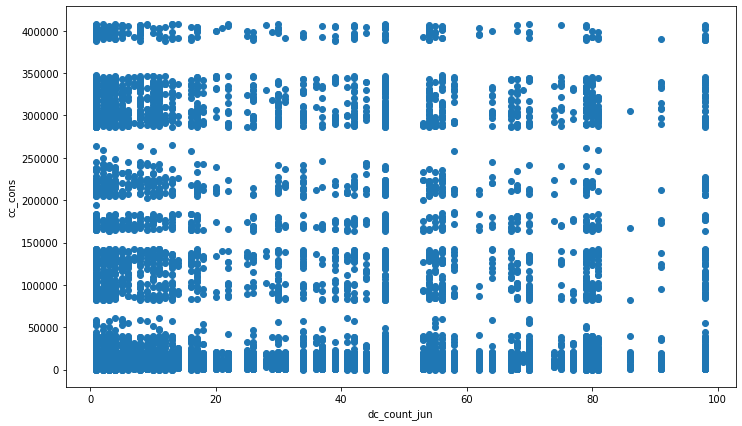

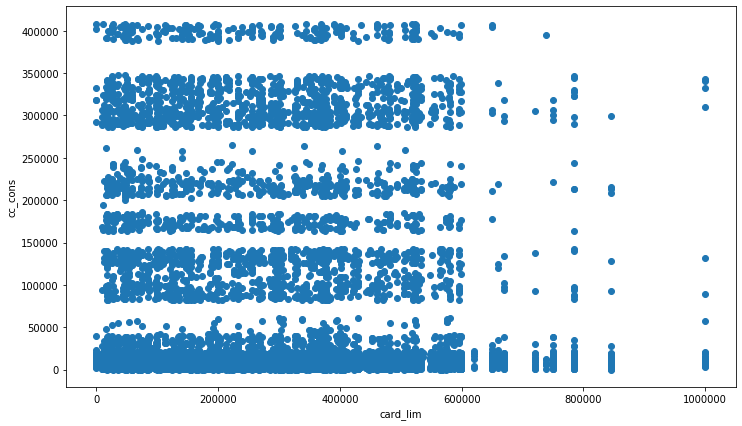

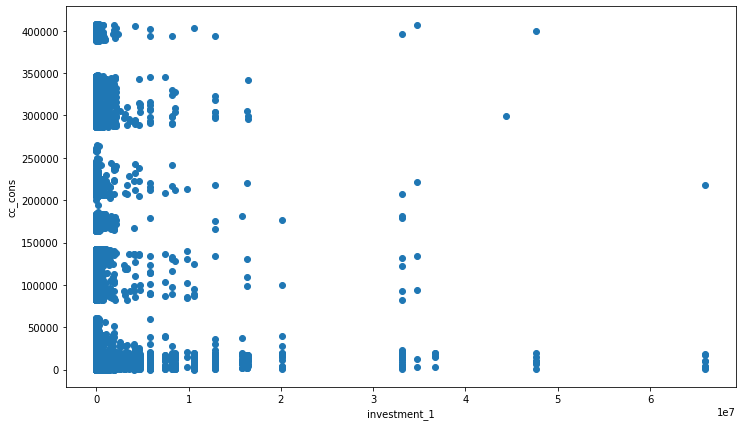

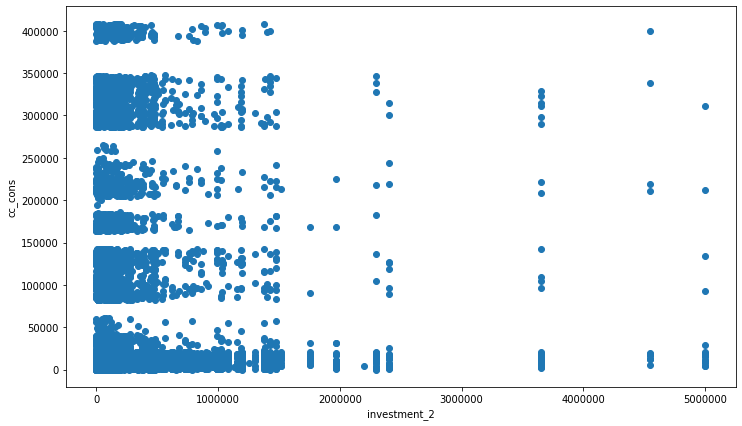

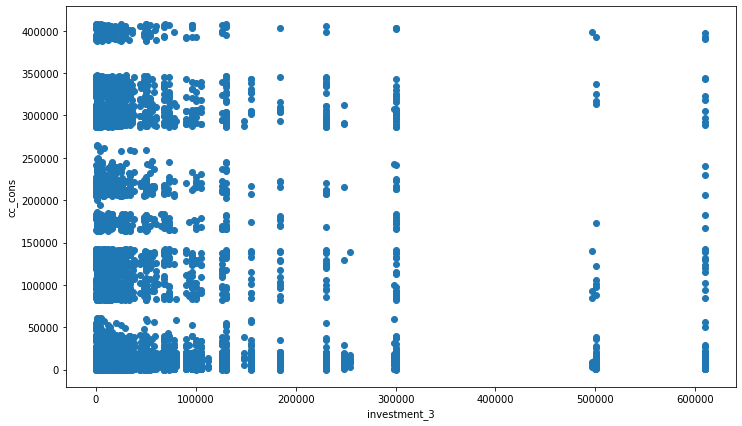

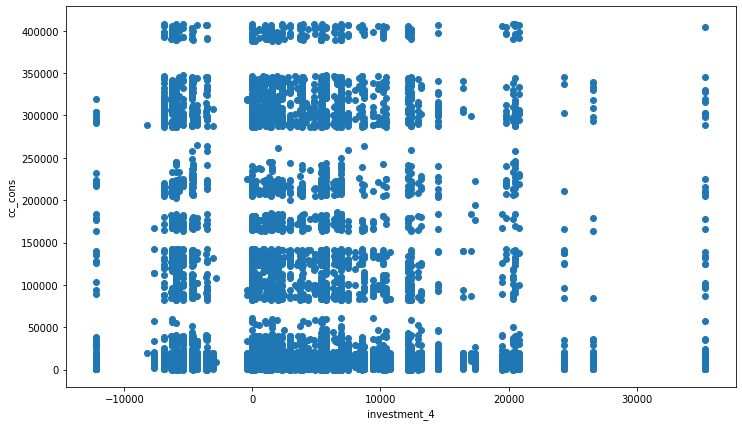

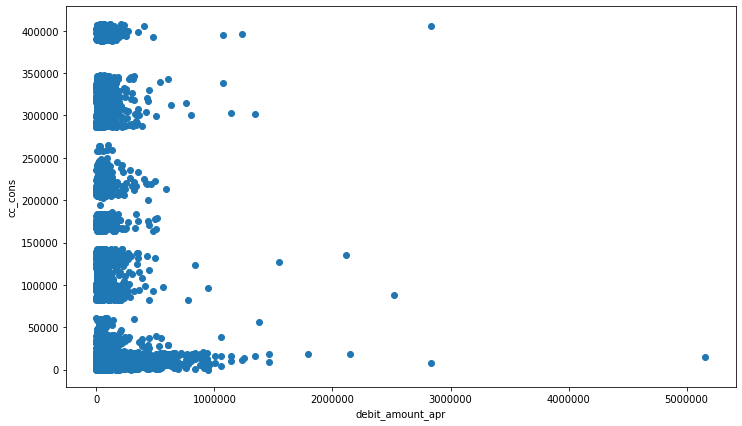

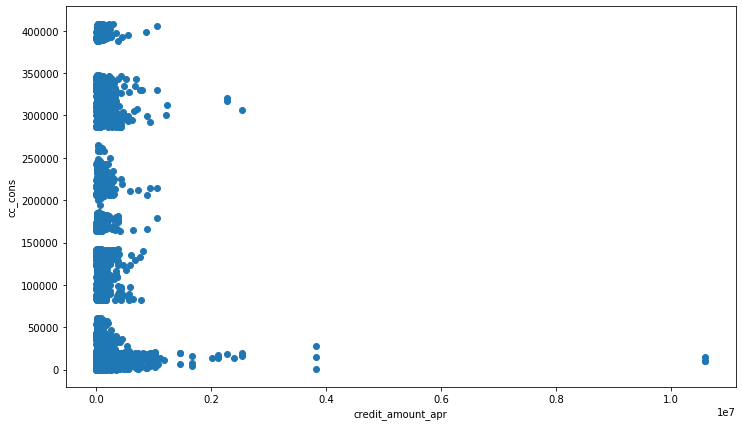

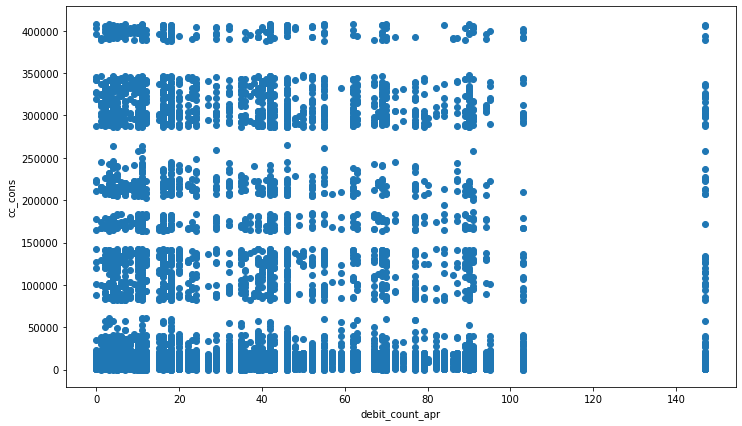

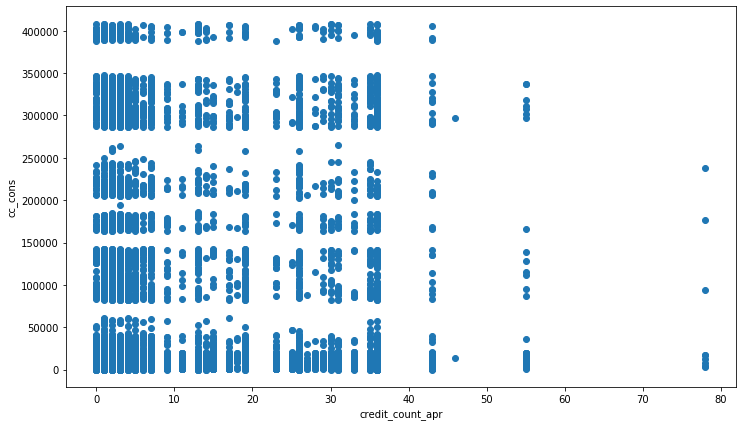

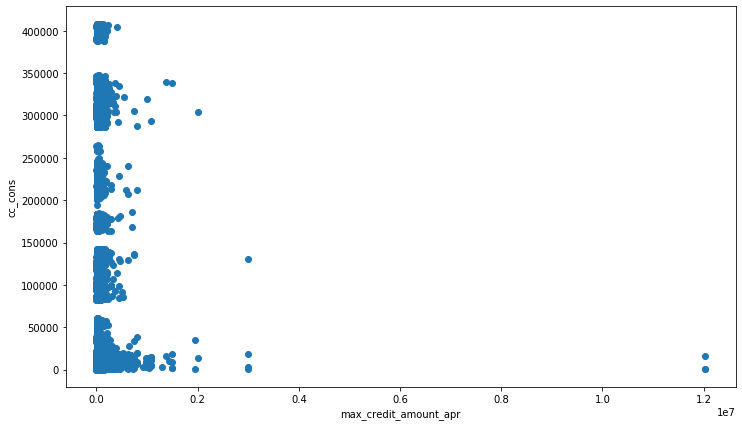

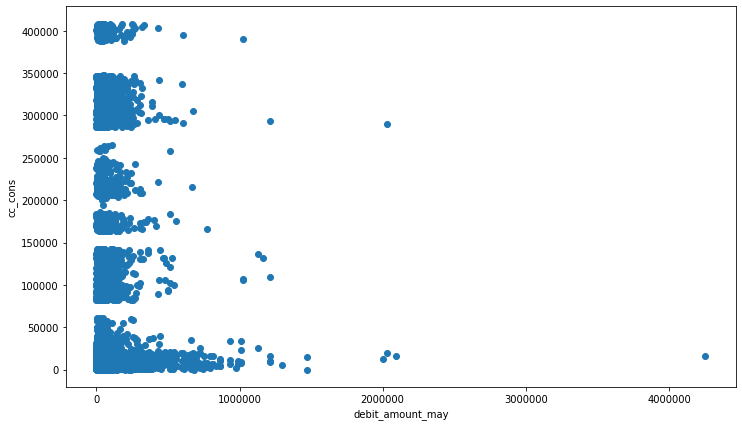

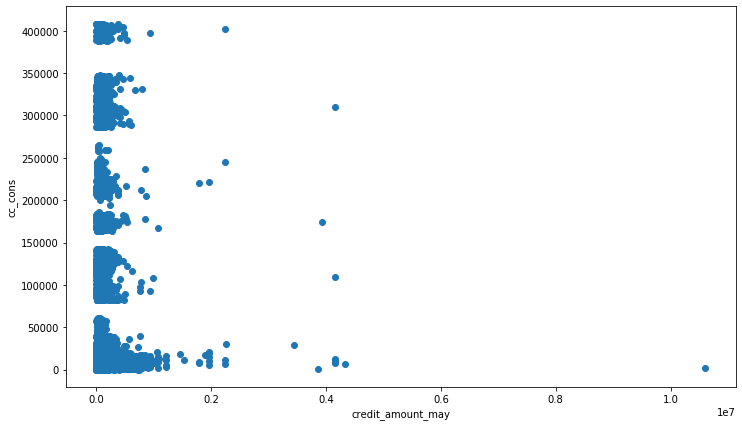

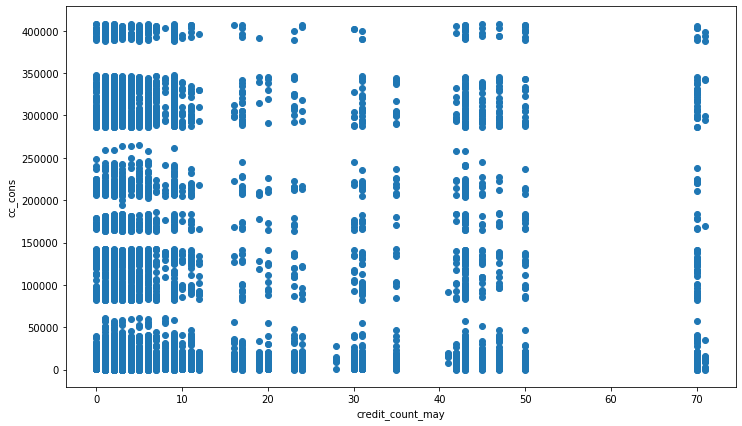

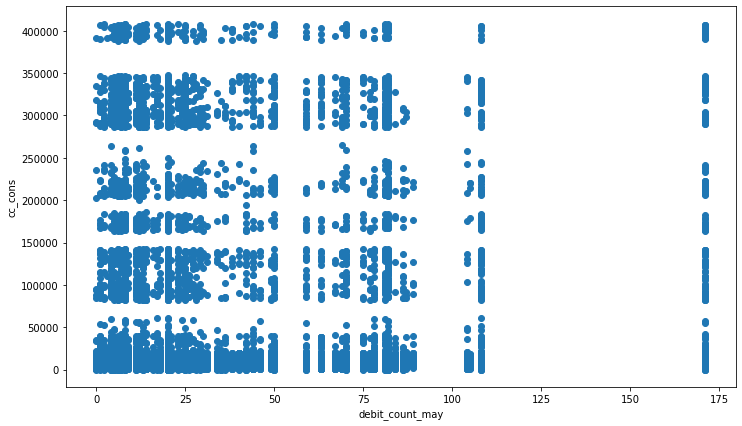

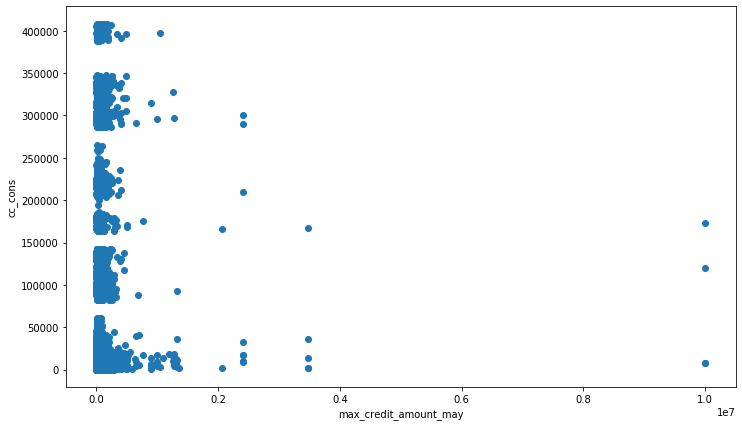

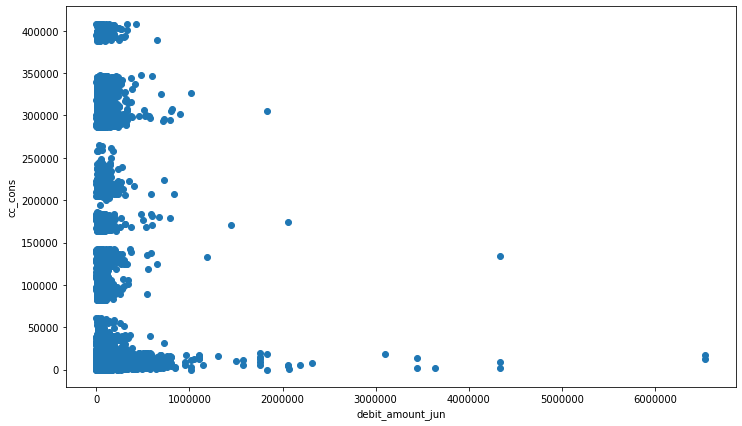

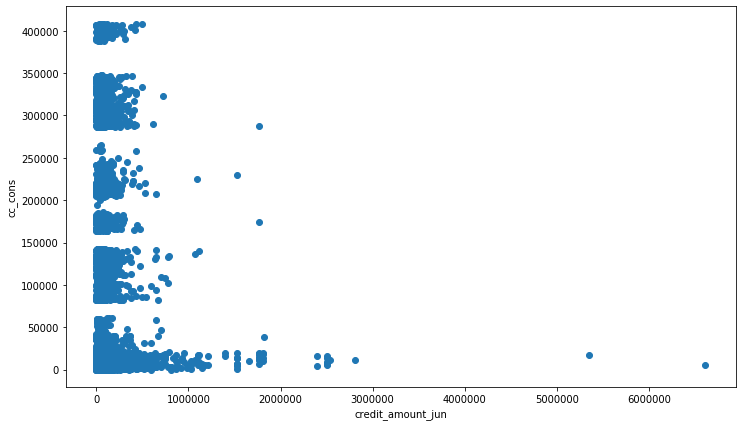

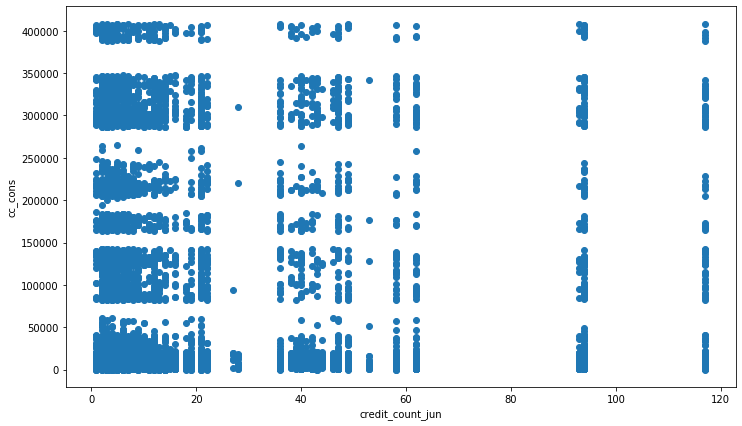

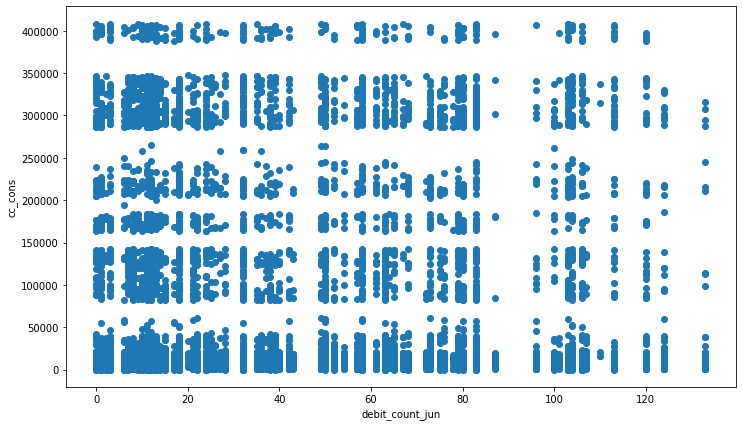

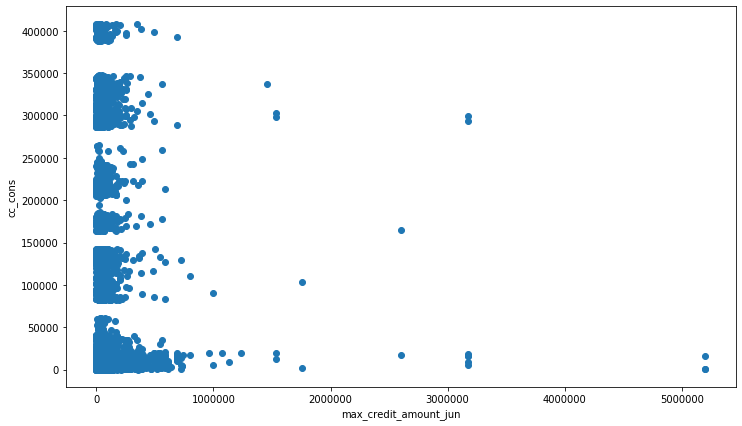

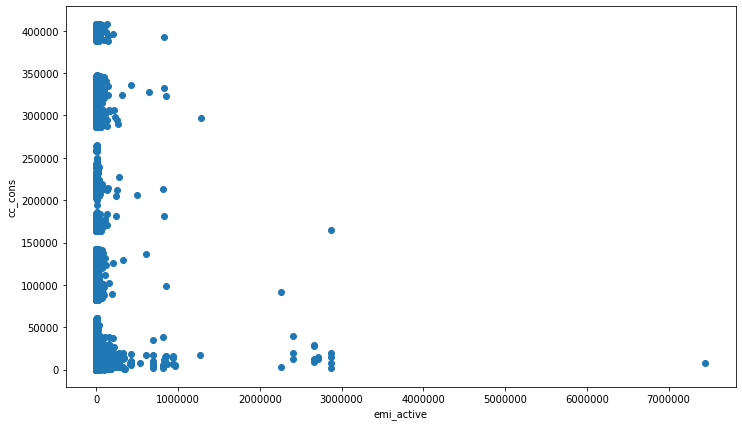

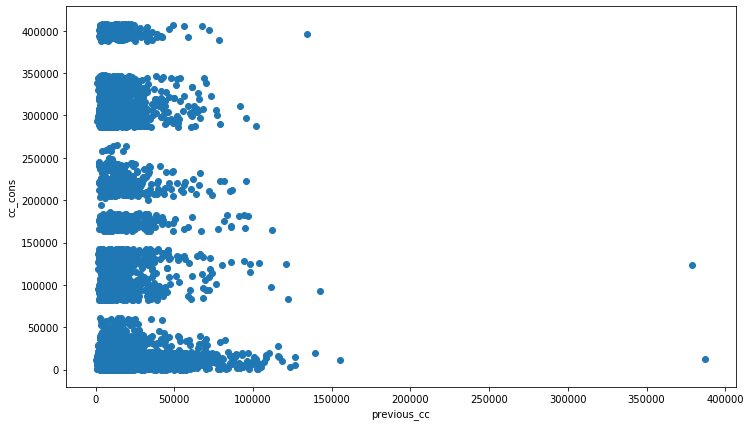

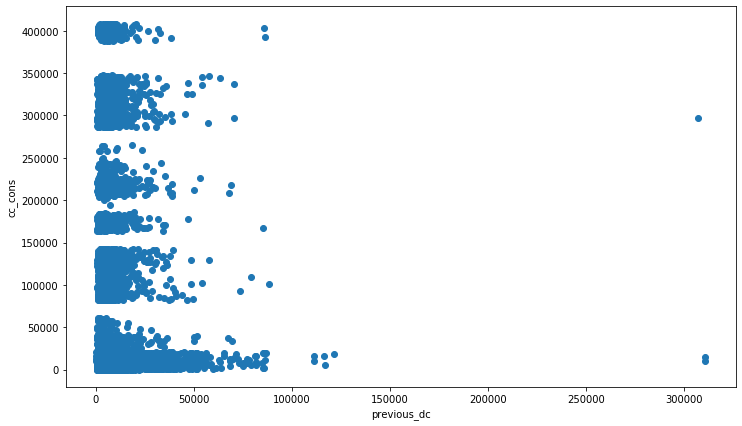

In [180]:
plot_scatter(numerical_data, 'cc_cons')

### Scatter plots have not given any type of relationship visualisation

In [181]:
#outlier analysis
def plot_boxplots(dataframe):
    for col in dataframe.columns:
        plt.figure()
        dataframe.boxplot([col])

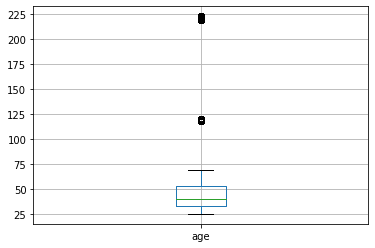

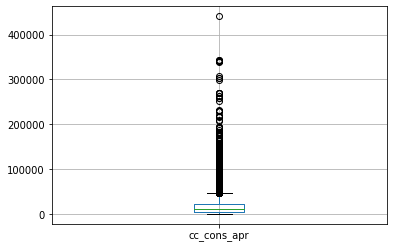

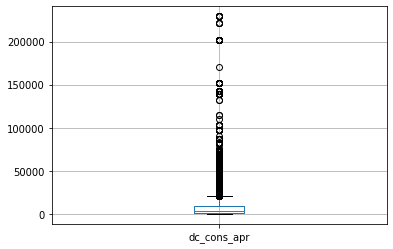

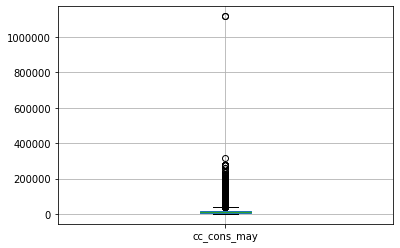

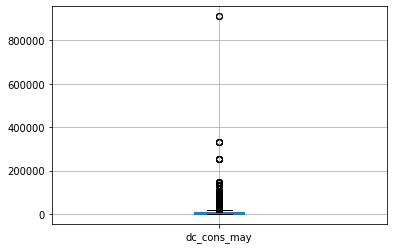

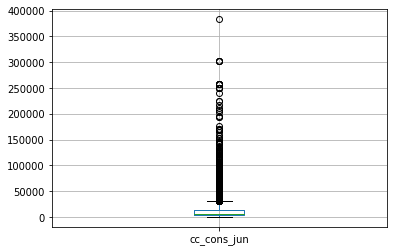

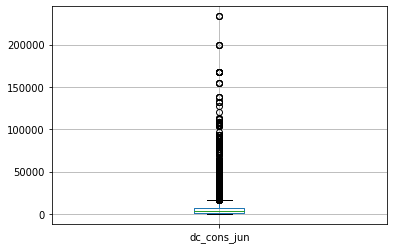

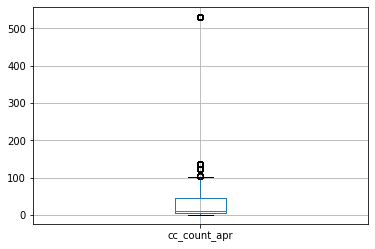

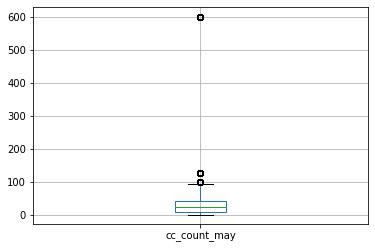

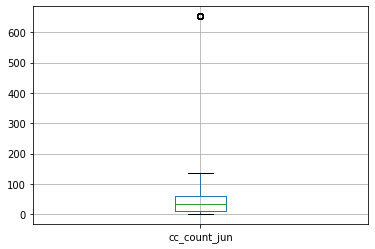

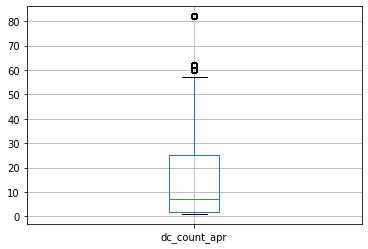

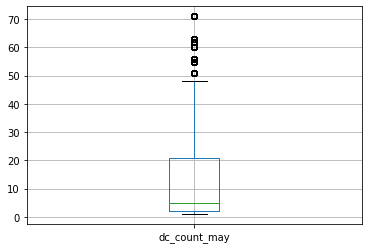

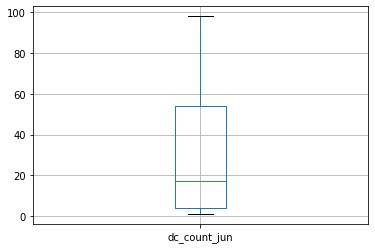

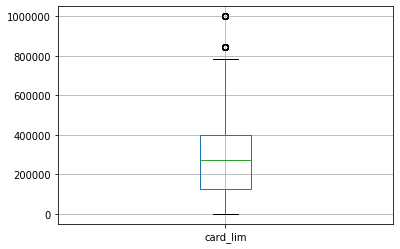

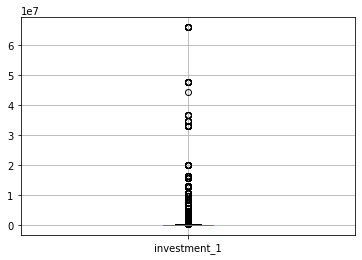

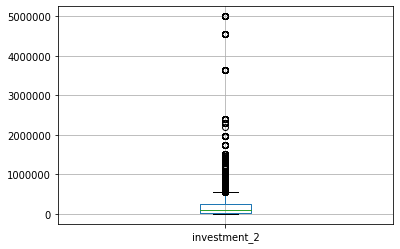

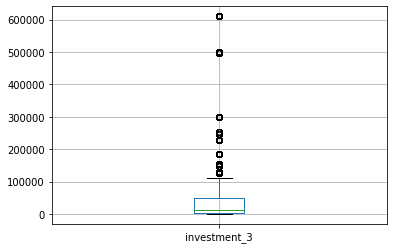

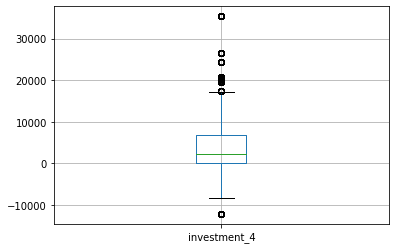

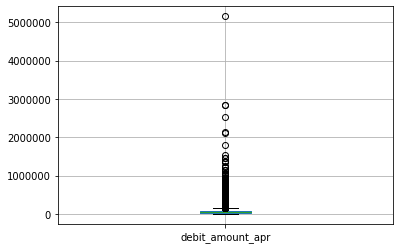

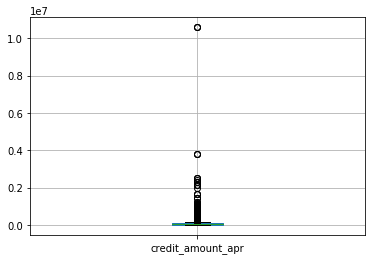

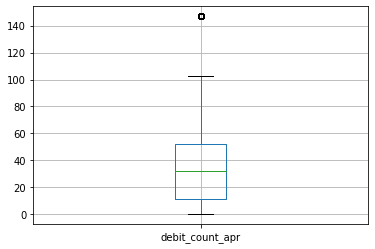

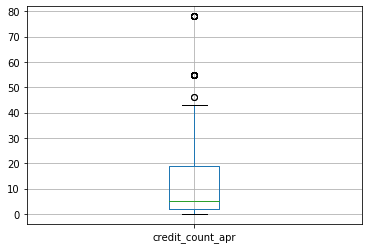

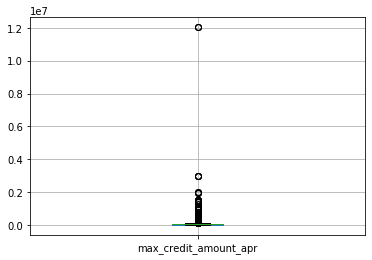

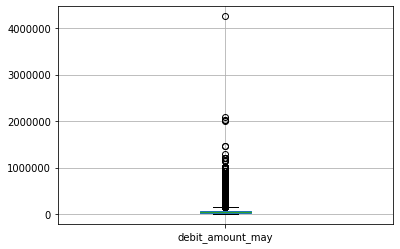

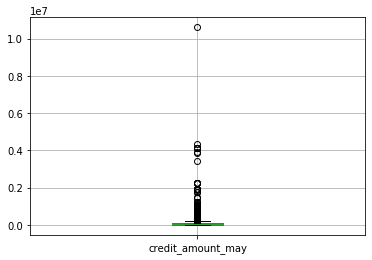

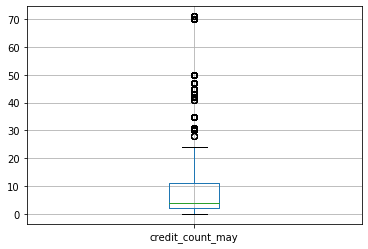

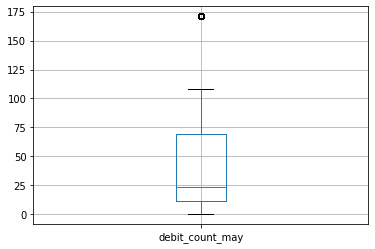

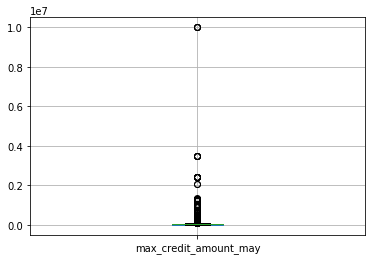

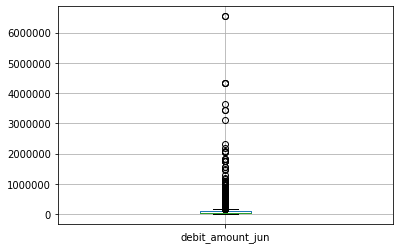

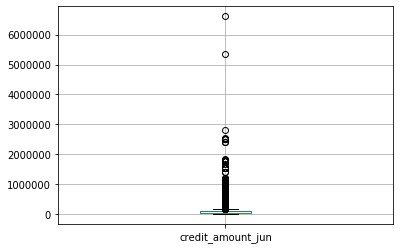

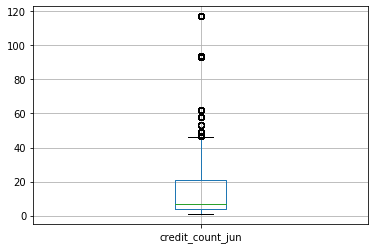

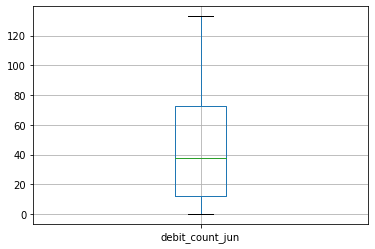

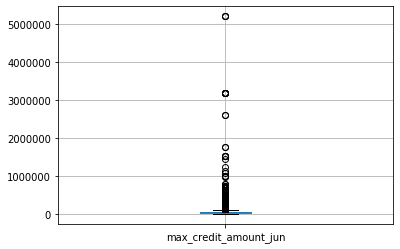

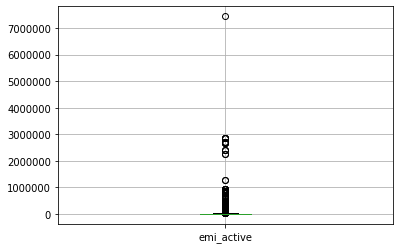

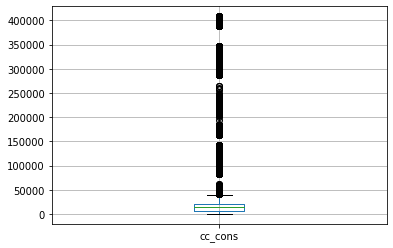

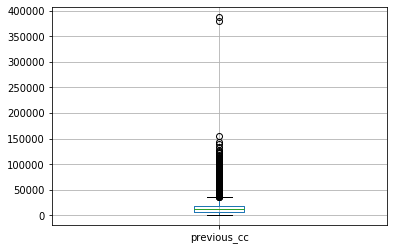

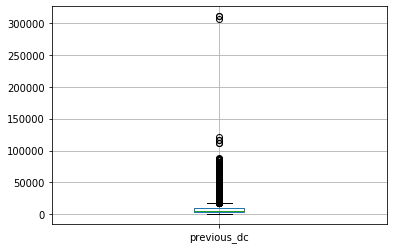

In [182]:
plot_boxplots(numerical_data)

### For almost every column, there are a very high number of outliers. We need to identify and treat them

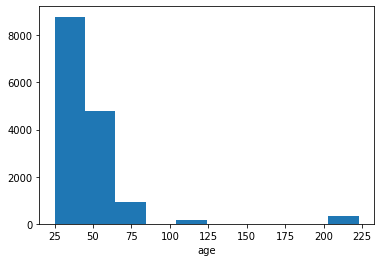

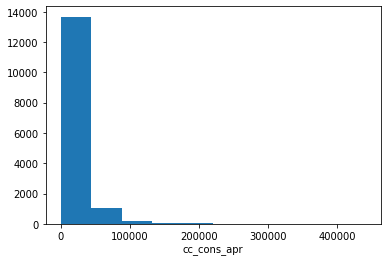

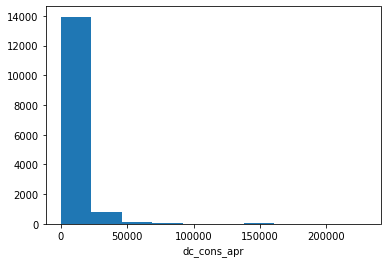

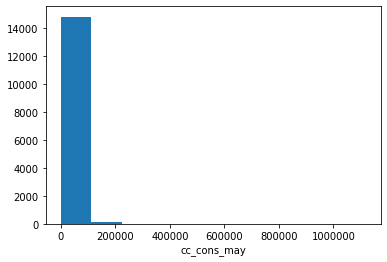

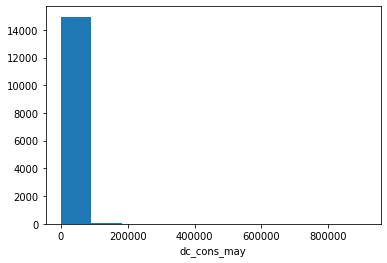

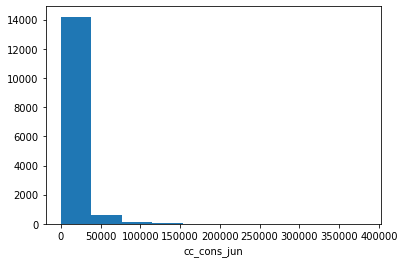

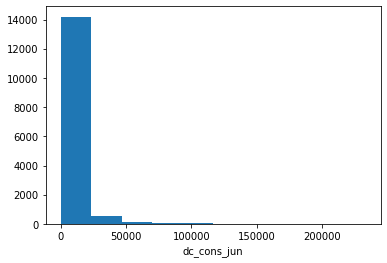

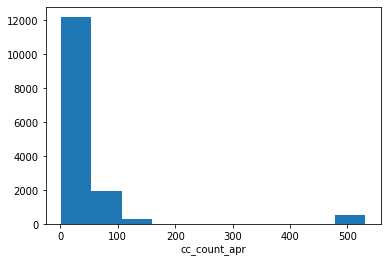

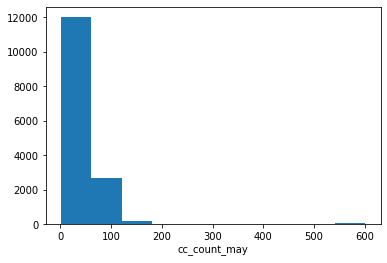

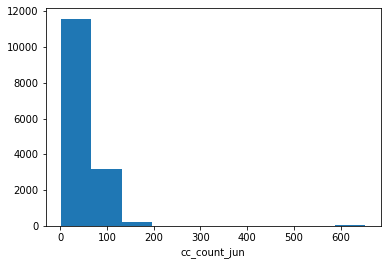

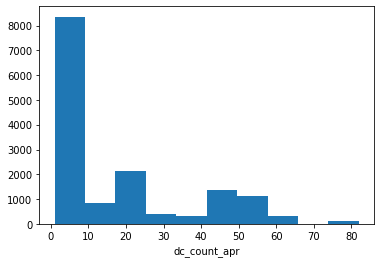

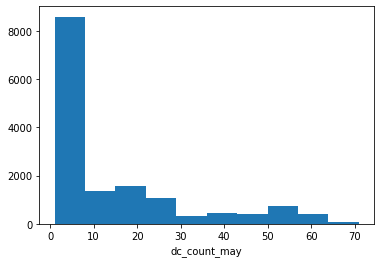

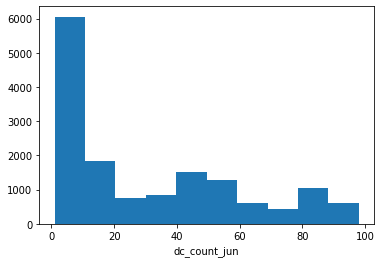

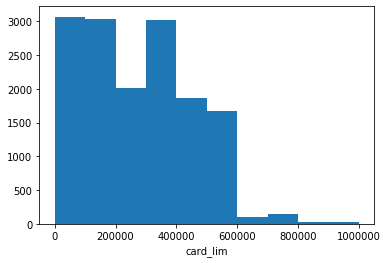

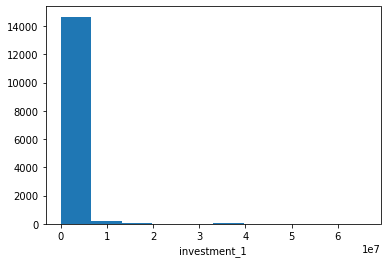

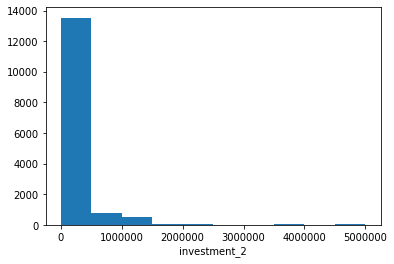

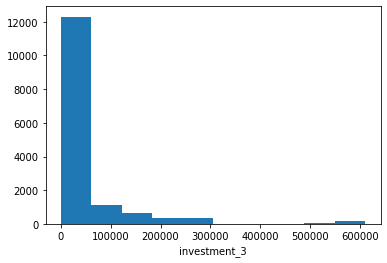

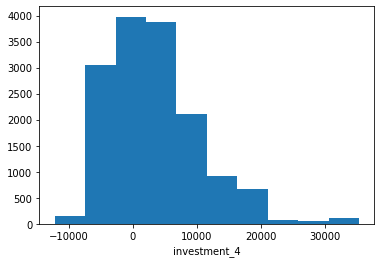

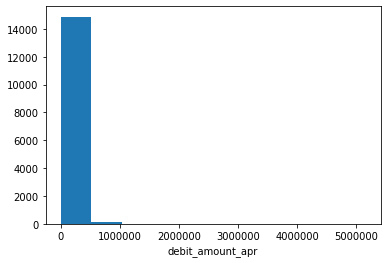

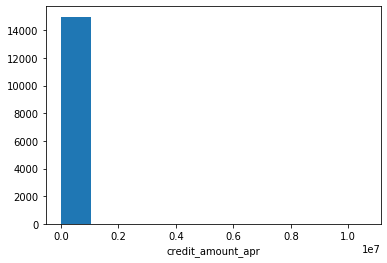

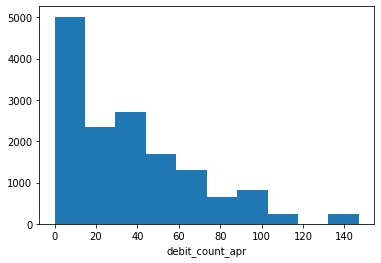

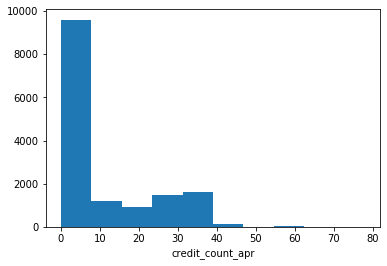

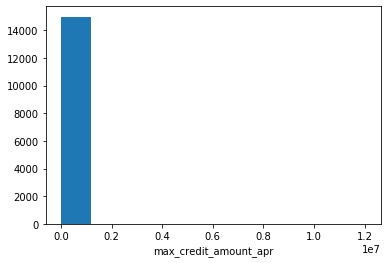

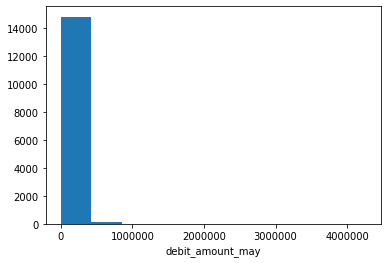

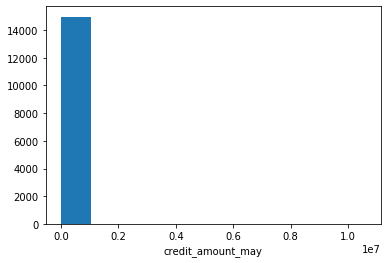

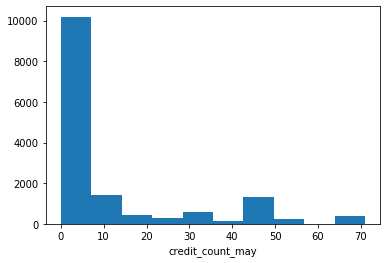

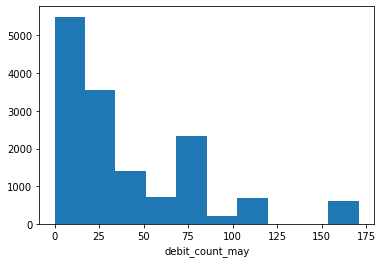

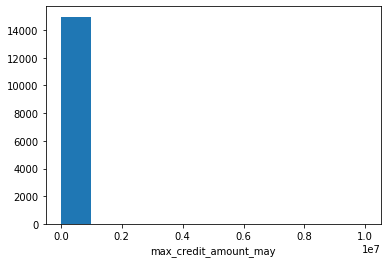

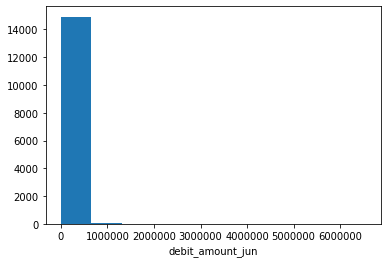

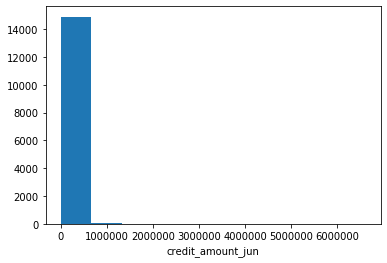

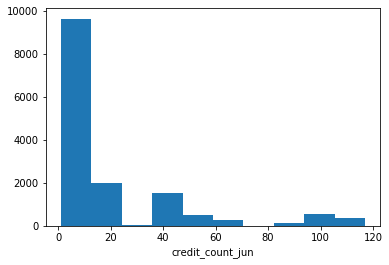

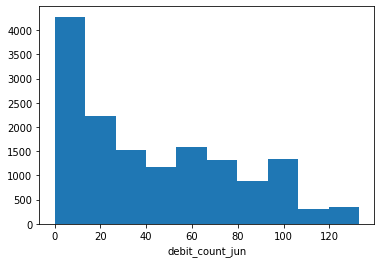

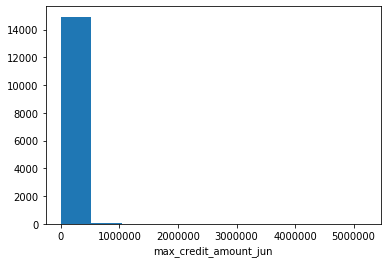

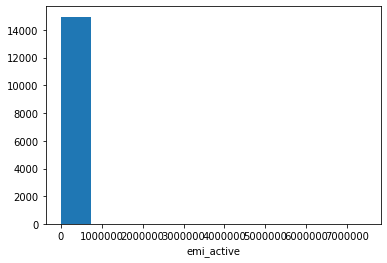

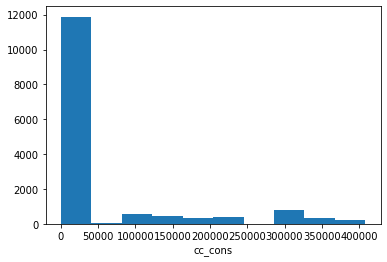

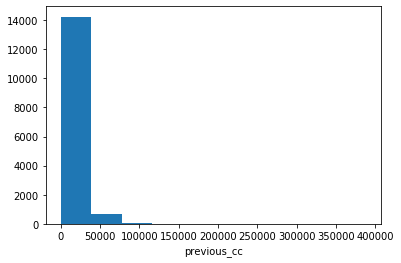

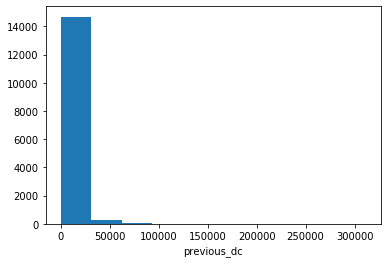

In [183]:
for col in numerical_data.columns:
    plt.figure()
    plt.hist(numerical_data[col])
    plt.xlabel(col)

### Every column is skewed in the right direction, one reason for this is due to the high number of outliers we observed earlier in the boxplots.

In [184]:
#checking the number of rows for each variable that fall outside 3*IQR range
def get_outliers_count(dataframe):
    count = {}
    for col in dataframe.columns:
        sorted_col = sorted(dataframe[col])
        Q1,Q3 = np.percentile(sorted_col , [25,75])
        IQR = Q3 - Q1
        lower_range = Q1 - (3 * IQR)
        upper_range = Q3 + (3 * IQR)    
        outliers_df = dataframe[(dataframe[col] > upper_range) | (dataframe[col] < lower_range)]
        count[col] = outliers_df[col].count()
    return count

In [185]:
numerical_data['cc_cons_apr'].max()

441031.33

In [36]:
get_outliers_count(numerical_data)

{'age': 534,
 'cc_cons_apr': 478,
 'dc_cons_apr': 604,
 'cc_cons_may': 548,
 'dc_cons_may': 621,
 'cc_cons_jun': 546,
 'dc_cons_jun': 668,
 'cc_count_apr': 523,
 'cc_count_may': 73,
 'cc_count_jun': 49,
 'dc_count_apr': 0,
 'dc_count_may': 0,
 'dc_count_jun': 0,
 'card_lim': 0,
 'investment_1': 1831,
 'investment_2': 820,
 'investment_3': 751,
 'investment_4': 122,
 'debit_amount_apr': 589,
 'credit_amount_apr': 624,
 'debit_count_apr': 0,
 'credit_count_apr': 9,
 'max_credit_amount_apr': 719,
 'debit_amount_may': 593,
 'credit_amount_may': 473,
 'credit_count_may': 2060,
 'debit_count_may': 0,
 'max_credit_amount_may': 679,
 'debit_amount_jun': 510,
 'credit_amount_jun': 575,
 'credit_count_jun': 1026,
 'debit_count_jun': 0,
 'max_credit_amount_jun': 728,
 'emi_active': 881,
 'cc_cons': 3070,
 'previous_cc': 327,
 'previous_dc': 476}

### We cannot accept the outliers of age as those are wrong values. Hence, outliers of age are dropped manually from the dataset

In [186]:
#removes outliers which are not in 3*IQR range
def remove_outliers(dataframe, column):
    sorted_col = sorted(dataframe[column])
    Q1,Q3 = np.percentile(sorted_col , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (3 * IQR)
    upper_range = Q3 + (3 * IQR)  
    print(lower_range)
    print(upper_range)
    dataframe_out = dataframe[(dataframe[column] > lower_range) & (dataframe[column] < upper_range)]
    return dataframe_out

In [187]:
data = remove_outliers(data, 'age')

-27.0
113.0


In [188]:
data['age'].describe()

count    14466.000000
mean        42.668879
std         12.196320
min         25.000000
25%         33.000000
50%         38.000000
75%         53.000000
max         69.000000
Name: age, dtype: float64

In [189]:
#updating numerical dataframe with age outliers removed
numerical_data = data.drop(cat_cols, axis=1)
numerical_data['age'].describe()

count    14466.000000
mean        42.668879
std         12.196320
min         25.000000
25%         33.000000
50%         38.000000
75%         53.000000
max         69.000000
Name: age, dtype: float64

In [190]:
count_dict = get_outliers_count(numerical_data)
outliers_count_df = pd.DataFrame(count_dict.items(), columns=['Column', 'Outliers count'])
outliers_count_df

,Column,Outliers count
0,age,0
1,cc_cons_apr,462
2,dc_cons_apr,592
3,cc_cons_may,539
4,dc_cons_may,595
5,cc_cons_jun,533
6,dc_cons_jun,638
7,cc_count_apr,501
8,cc_count_may,71
9,cc_count_jun,46


### Apart from age outliers, the outliers from other columns cannot be ignored. One reason is they are very high in number, and also they are just extreme cases..so removing them is not a good option. Hence we are treating them

In [191]:
numerical_cols = ['age', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active']

In [239]:
X = data.drop(['cc_cons'], axis=1) 
y = numerical_data['cc_cons']

In [240]:
def treat_outliers(dataframe, col_list):
    for col in col_list:
        dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.05],inclusive=(True, True))
    return dataframe

In [241]:
X.columns

Index(['age', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'previous_cc', 'previous_dc',
       'account_type_current', 'account_type_saving', 'gender_F', 'gender_M'],
      dtype='object')

In [242]:
treated_df = treat_outliers(X, numerical_cols)

In [243]:
count_dict = get_outliers_count(treated_df)
outliers_count_df = pd.DataFrame(count_dict.items(), columns=['Column', 'Outliers count'])
outliers_count_df

,Column,Outliers count
0,age,0
1,cc_cons_apr,0
2,dc_cons_apr,0
3,cc_cons_may,0
4,dc_cons_may,0
5,cc_cons_jun,0
6,dc_cons_jun,0
7,cc_count_apr,0
8,cc_count_may,0
9,cc_count_jun,0


In [244]:
treated_df.drop(['previous_cc','previous_dc'], axis=1, inplace=True)

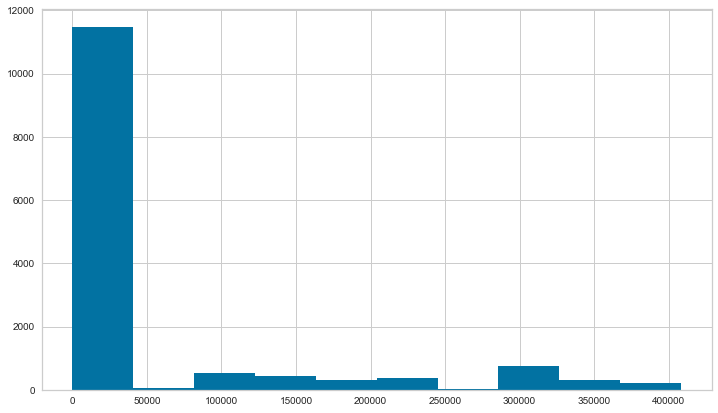

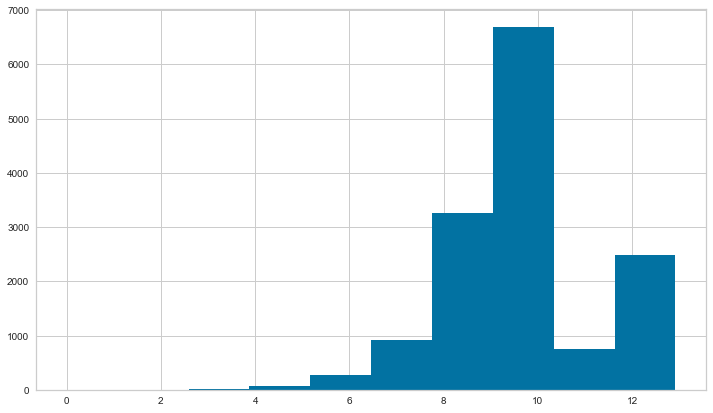

In [245]:
#performing scaling and transformation
plt.figure(figsize=(12,7))
plt.hist(y)
plt.figure(figsize=(12,7))
plt.hist(np.log1p(y))
plt.show()

In [236]:
y = np.log1p(y)

### Taking logarithm of cc_cons removes its skewness

In [247]:
#for other variables using standard scaler
def scale(dataframe, cols_list):
    scaler = StandardScaler()
    dataframe[cols_list] = scaler.fit_transform(dataframe[cols_list])
    return dataframe

In [248]:
scaled_df = scale(treated_df, numerical_cols)

In [249]:
scaled_df

,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,account_type_current,account_type_saving,gender_F,gender_M
0,-0.637918,0.559150,-0.877736,-0.265819,2.882137,0.539071,0.879776,-0.743672,-0.154183,-0.977065,...,-0.622736,-0.893250,-0.686829,0.614435,0.208845,-0.625996,1,0,0,1
1,-0.637918,0.186023,-0.797948,0.444273,-0.885198,-0.602635,-0.765399,-0.773301,-0.830149,-0.874108,...,-0.407862,0.163754,0.063337,0.555497,-0.526993,0.577242,1,0,0,1
2,1.017886,-0.645496,-0.559397,-0.835008,-0.352863,1.263827,-0.097315,0.471110,0.059281,1.734159,...,-0.118445,0.148377,-0.489417,-1.242095,-0.425453,1.882364,1,0,0,1
3,-1.134660,0.910027,-0.761310,-0.107041,0.433829,0.655336,1.225797,0.767398,-1.008035,0.395706,...,0.085934,0.038836,0.063337,1.144872,0.000992,-0.428064,1,0,1,0
4,-0.720709,-0.534992,0.008083,-0.670922,-0.654254,-0.800824,0.161804,1.182201,0.592939,1.493924,...,-0.978499,0.229295,-0.449934,-0.358033,-0.291984,0.549419,1,0,0,1
5,-1.217450,-0.855567,-0.712251,0.396935,-0.789246,0.103627,-0.805487,-0.625156,-0.830149,0.704580,...,-0.226713,2.224942,-0.686829,-0.269627,-0.685354,-0.271202,1,0,0,1
6,-0.886289,-0.898477,-0.249317,-0.359257,-0.622213,-0.369937,-0.718604,-0.506641,-1.008035,-1.148662,...,-0.670754,2.232698,1.524185,-0.947407,-0.965325,-0.640724,1,0,0,1
7,-1.217450,-0.639876,-0.662660,2.809078,-0.651685,-0.358921,-0.712364,-0.032580,-1.008035,0.704580,...,-0.224590,-0.982199,-0.568382,0.408154,0.370457,0.751466,1,0,0,1
8,1.928578,-0.924100,-0.602561,1.009213,-0.090046,1.029021,-0.746057,1.922921,0.130435,1.562562,...,-0.098366,-0.932160,-0.686829,1.026997,-0.809496,-0.318129,1,0,1,0
9,-0.472338,2.043927,-0.385735,-0.824888,-0.558582,0.490953,-0.026279,-0.625156,-0.936881,1.665520,...,2.776221,-0.273300,-0.686829,0.555497,-0.652307,0.978971,1,0,0,1


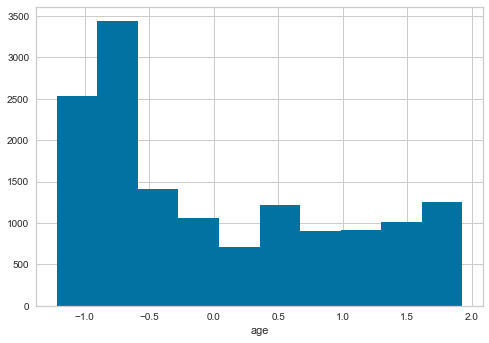

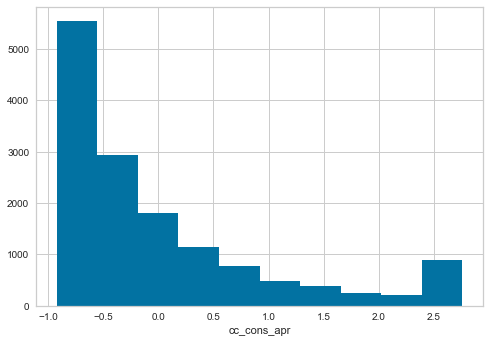

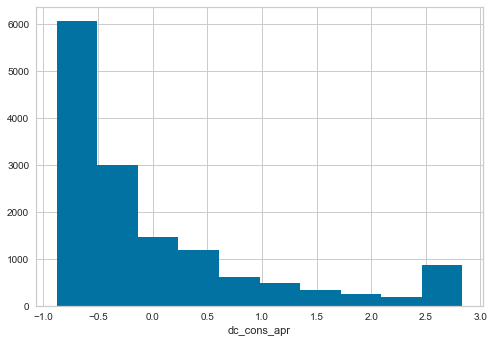

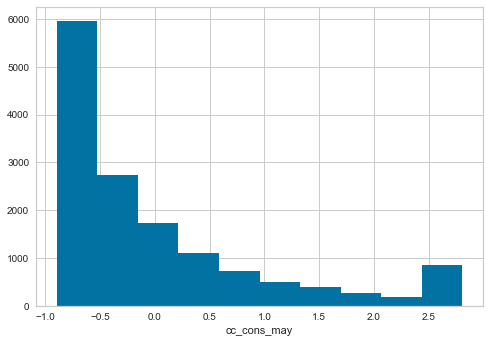

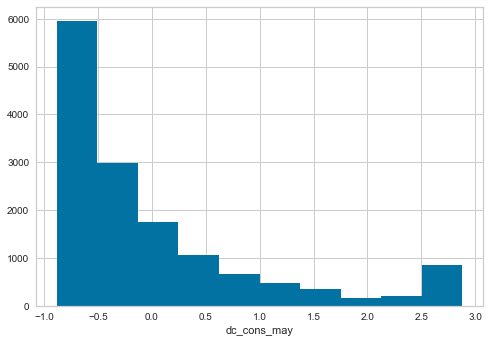

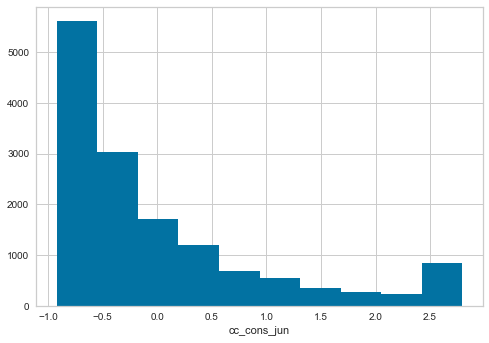

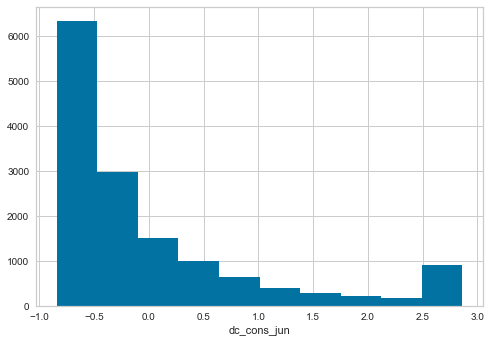

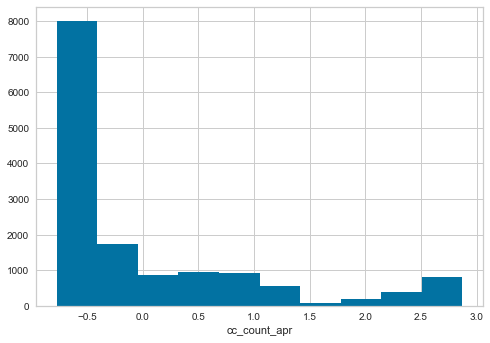

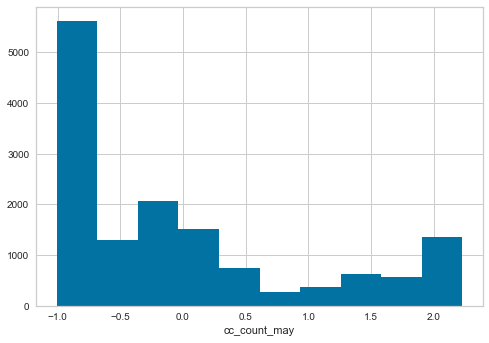

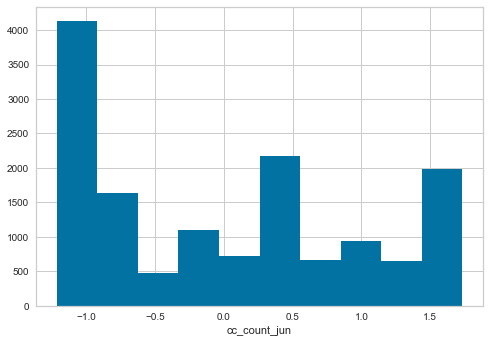

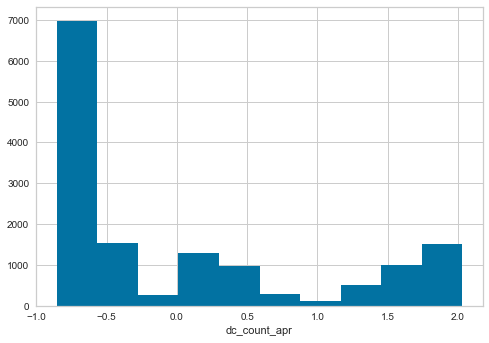

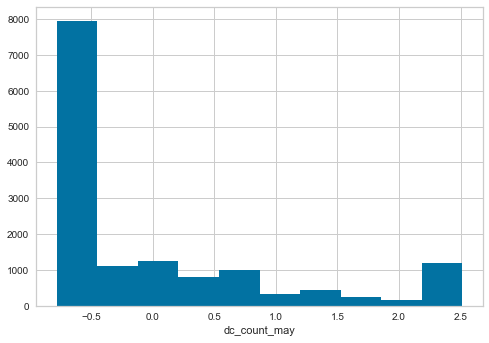

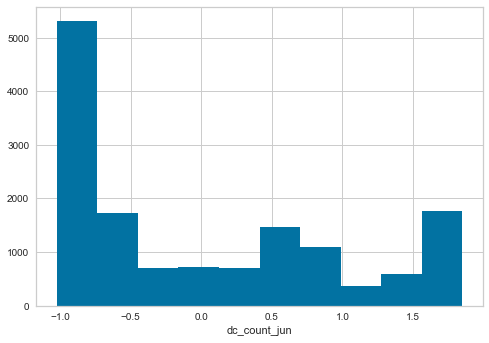

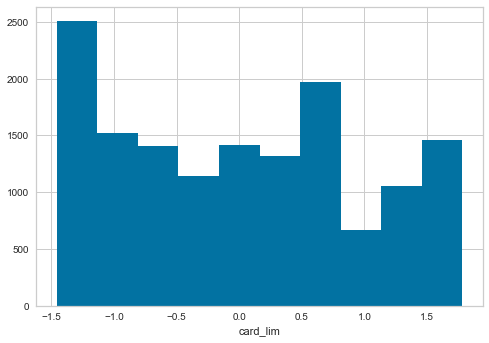

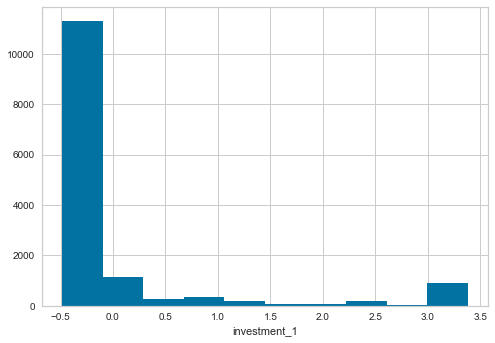

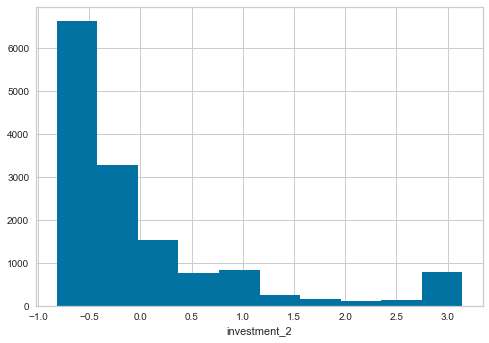

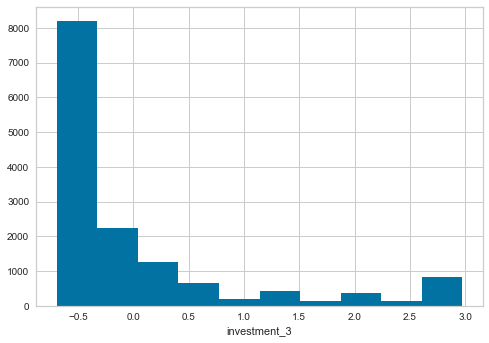

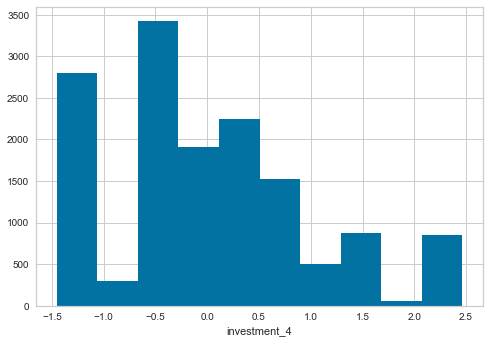

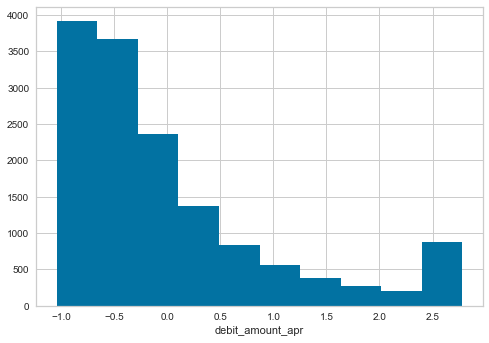

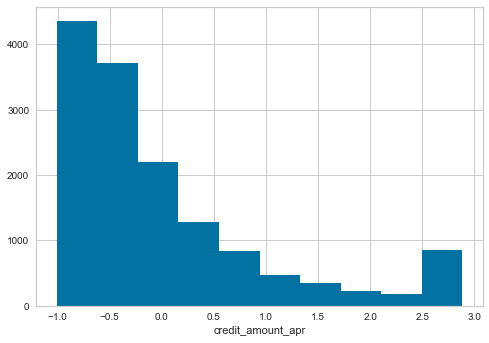

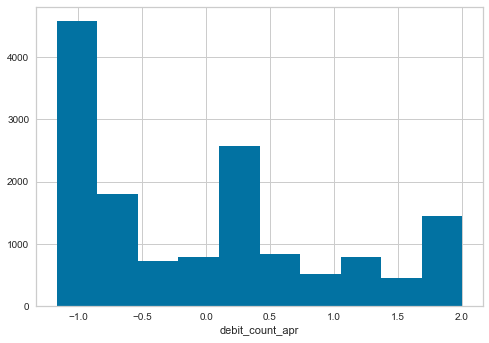

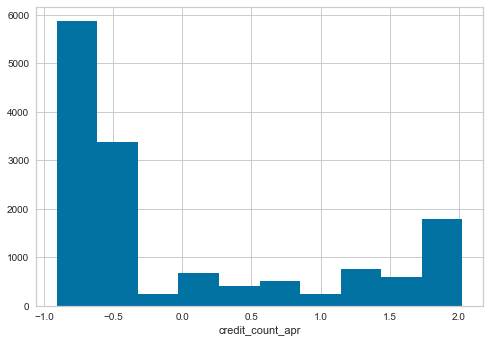

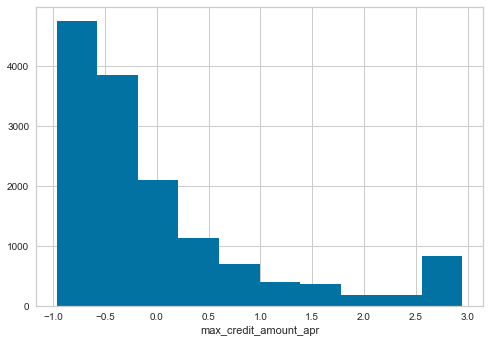

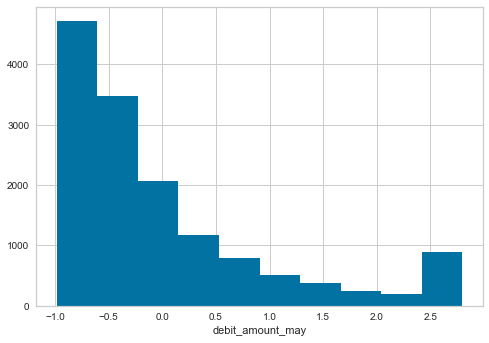

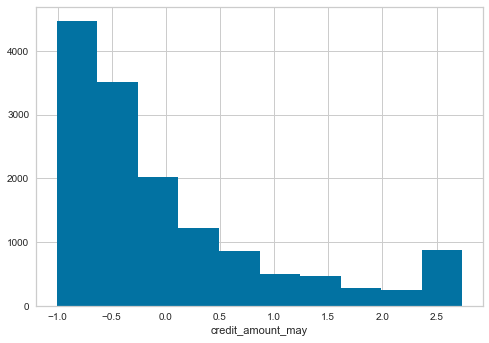

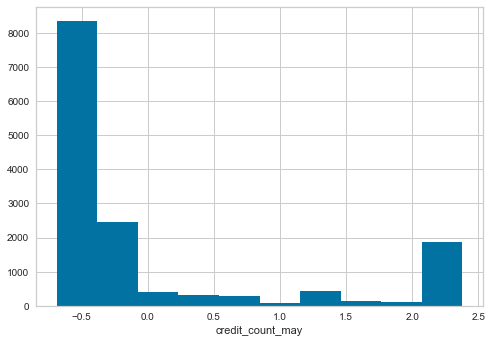

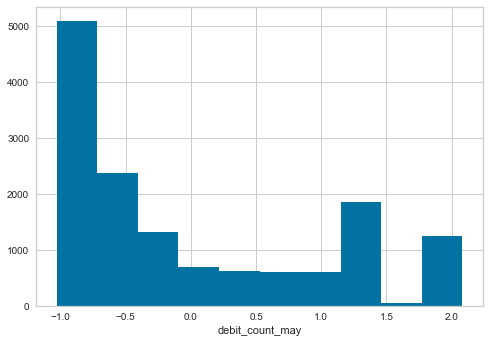

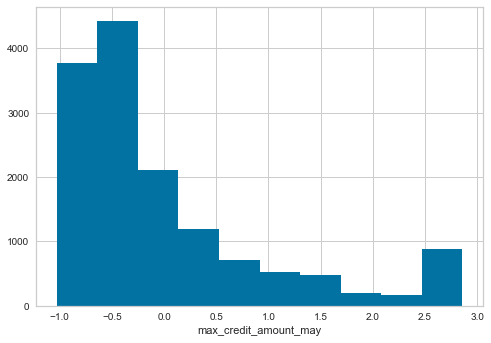

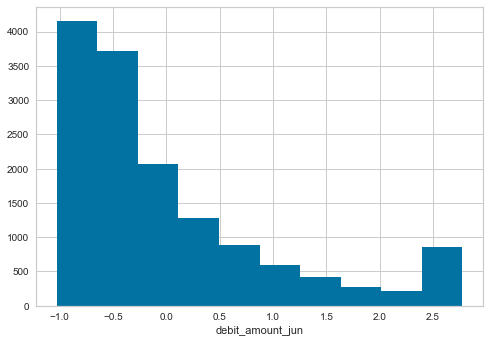

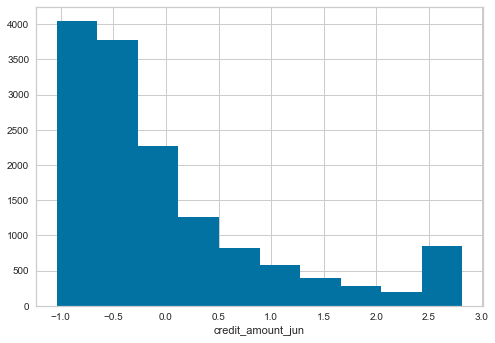

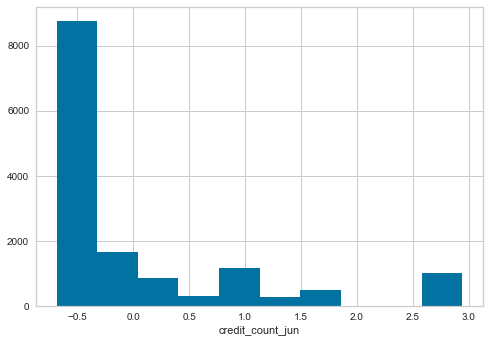

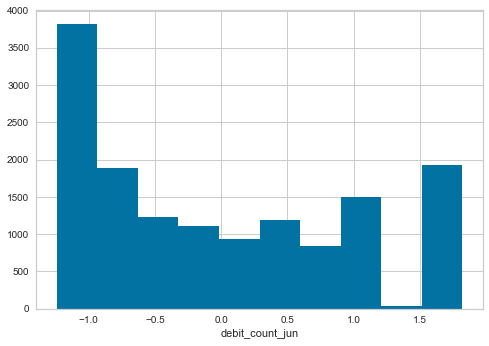

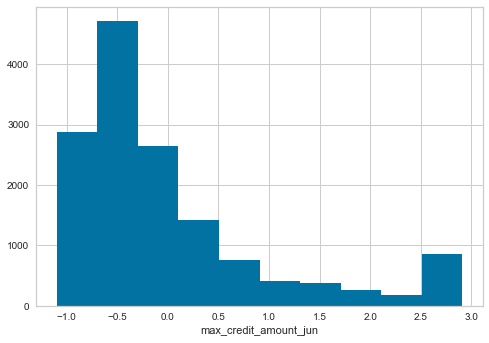

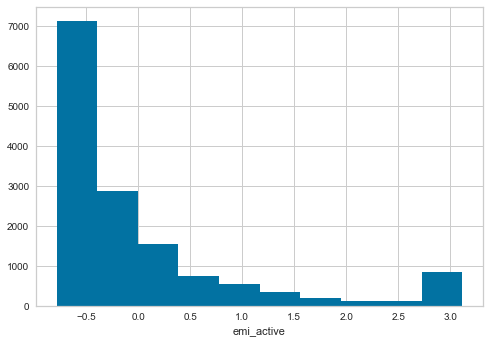

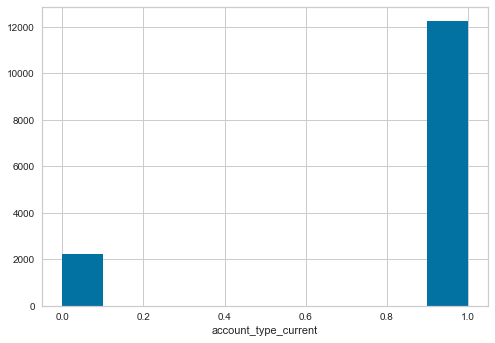

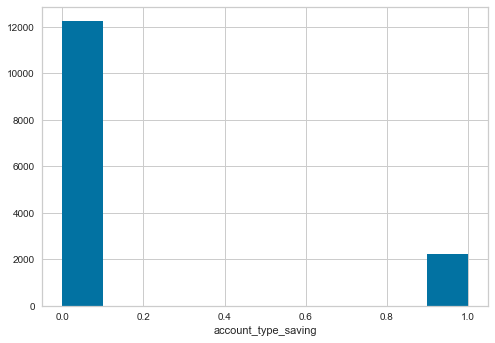

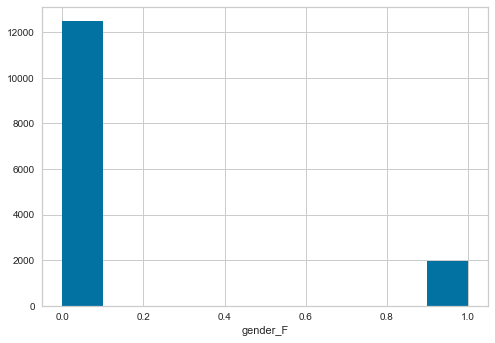

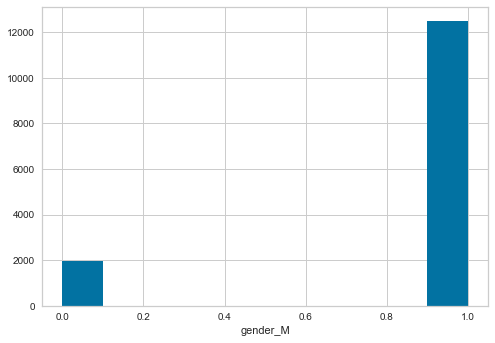

In [250]:
for col in scaled_df.columns:
    plt.figure()
    plt.hist(scaled_df[col])
    plt.xlabel(col)

In [251]:
def rmsle(actual_column, predicted_column):
    sum=0.0
    for x,y in zip(actual_column,predicted_column):
        if x<0 or y<0: #check for negative values. 
            continue
        p = np.log(y+1)
        r = np.log(x+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted_column))**0.5

In [252]:
test_data = pd.read_csv('Test.csv')

In [253]:
test_data

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17591,current,M,37,575,2795.450,1290.00,6141.050,676.50,9146.100,...,24.0,20.0,9750.00,30527.88,31271.00,3.0,12.0,25945.92,Y,1170.49
1,13541,current,M,33,394,29405.130,1640.00,1670.000,2463.92,10947.500,...,43.0,40.0,16967.00,14342.83,16582.00,6.0,39.0,12214.00,Y,16447.45
2,13431,current,M,53,324,5985.200,6189.00,2696.090,766.00,716.000,...,42.0,35.0,36398.00,32503.16,33539.54,5.0,9.0,13215.00,Y,2622.28
3,8687,current,M,33,370,2105.930,18225.00,34763.560,167.00,4260.270,...,3.0,5.0,97825.00,93572.42,109429.75,21.0,0.0,72317.00,Y,340.79
4,14727,current,M,62,505,3269.000,3532.00,3158.400,2699.77,3373.480,...,70.0,75.0,27936.00,19011.50,41401.00,6.0,35.0,42344.00,Y,2812.20
5,14988,saving,M,30,454,11495.510,2701.00,3957.240,1395.00,36608.500,...,2.0,8.0,27906.00,23978.50,32248.75,9.0,63.0,24986.00,Y,291.16
6,14859,current,M,33,796,3837.390,10809.00,126467.150,6204.00,3947.370,...,2.0,20.0,11388.00,14789.48,33319.00,5.0,32.0,45228.00,Y,4786.40
7,16636,current,M,223,575,22928.500,6331.49,9974.840,2699.00,4578.000,...,3.0,20.0,69056.00,25376.75,81303.01,22.0,58.0,39930.00,Y,8186.99
8,7625,saving,M,37,623,2698.000,727.00,5264.500,5528.00,11310.500,...,47.0,13.0,15700.00,22579.57,12317.00,6.0,12.0,63300.00,Y,54632.60
9,16492,current,M,34,123,6772.780,332.00,3343.560,8650.56,3672.500,...,47.0,11.0,77764.00,178334.88,111699.00,1.0,6.0,24559.00,Y,3796.29


In [254]:
def custom_pipeline(dataframe):
    #dropping unnecessary columns
    not_req = ['ID','region_code','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','loan_enq']
    dataframe = dataframe.drop(not_req, axis=1)
    
    #one hot encoding on categorical data
    dataframe = pd.get_dummies(data=dataframe, columns=['account_type', 'gender'])
    
    #list of numerical and categorical columns
    numerical_cols = ['age', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active']
    cat_cols = ['account_type_current','account_type_saving','gender_F','gender_M']
    
    #scaling on test data
    dataframe = scale(dataframe, numerical_cols)
    return dataframe

In [307]:
#assessing linear model on this data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred = linear_model.predict(X_test)
print("Training score: "+str(linear_model.score(X_train, y_train)))
print("Test score: "+str(linear_model.score(X_test, y_test)))

Training score: 0.0022224508731032433
Test score: 0.0018697812451088367


In [308]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

70688.98973607038
9819146332.274612
99091.60576090496


In [309]:
print(rmsle(y_test, y_pred))

2.0574147389310524


In [310]:
resid = y_test - y_pred

(array([3701.,   91.,  164.,  148.,  103.,  126.,   24.,  260.,   76.,
          81.]),
 array([-67725. , -24868.2,  17988.6,  60845.4, 103702.2, 146559. ,
        189415.8, 232272.6, 275129.4, 317986.2, 360843. ]),
 <a list of 10 Patch objects>)

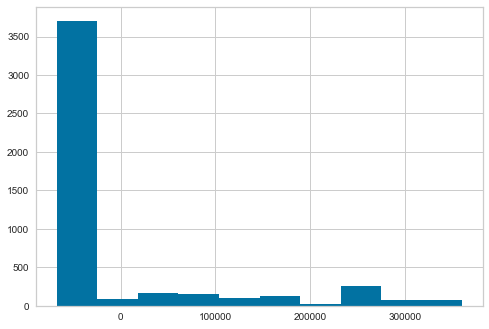

In [311]:
plt.hist(resid)

### Linear regression residuals plot is not normal. This might be due to the non-linear relationship with the outcome variable.

In [313]:
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Training score: "+str(dt_model.score(X_train, y_train)))
print("Test score: "+str(dt_model.score(X_test, y_test)))

Training score: 1.0
Test score: -1.0448265845058349


In [314]:
print(metrics.mean_absolute_error(y_test, y_pred_dt))
print(metrics.mean_squared_error(y_test, y_pred_dt))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))

83731.48135735233
20116064096.761627
141831.111173683


In [315]:
print(rmsle(y_test, y_pred_dt))

2.305673955246695


In [316]:
resid = y_test - y_pred_dt

(array([ 126.,  252.,  182.,  339., 1638., 1481.,  272.,  156.,  225.,
         103.]),
 array([-4.073240e+05, -3.258491e+05, -2.443742e+05, -1.628993e+05,
        -8.142440e+04,  5.050000e+01,  8.152540e+04,  1.630003e+05,
         2.444752e+05,  3.259501e+05,  4.074250e+05]),
 <a list of 10 Patch objects>)

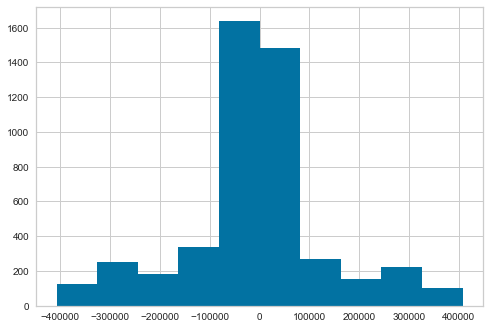

In [317]:
plt.hist(resid)

### Decision tree regressor gave a bit high rmsle but the residuals plot was normal. This might be due to decision tree regressor was able to catch non-normal relationship with the output variable.

In [318]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Training score: "+str(dt_model.score(rf_model, y_train)))
print("Test score: "+str(dt_model.score(rf_model, y_test)))

TypeError: float() argument must be a string or a number, not 'DecisionTreeRegressor'

In [271]:
print(metrics.mean_absolute_error(y_test, y_pred_rf))
print(metrics.mean_squared_error(y_test, y_pred_rf))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

76988.27896941768
11284650369.361525
106229.2350031832


In [272]:
print(rmsle(y_test, y_pred_rf))

2.1444681001506183


In [273]:
resid = y_test - y_pred_rf

(array([2.000e+00, 5.100e+01, 8.330e+02, 2.435e+03, 6.400e+02, 2.270e+02,
        1.610e+02, 1.860e+02, 1.880e+02, 5.100e+01]),
 array([-281784.3 , -213971.66, -146159.02,  -78346.38,  -10533.74,
          57278.9 ,  125091.54,  192904.18,  260716.82,  328529.46,
         396342.1 ]),
 <a list of 10 Patch objects>)

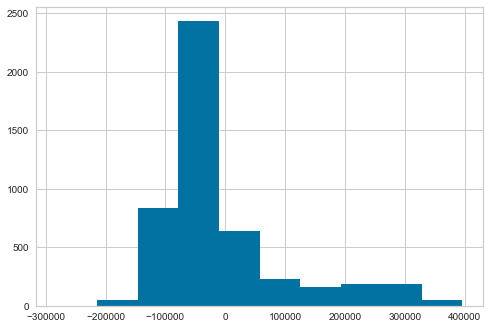

In [274]:
plt.hist(resid)

### Random forest regressor also gave similar results as decision tree regressor.

In [275]:
test_scaled = custom_pipeline(test_data)

In [277]:
y_pred_rf = rf_model.predict(test_scaled)

In [281]:
y_pred_rf

array([75863.1,  8503.9, 39251.5, ..., 10362.7, 37122.9,  9889.9])

In [292]:
to_submit = pd.DataFrame({'ID': test_data['ID'], 'cc_cons': y_pred_rf} )

In [293]:
to_submit

,ID,cc_cons
0,17591,75863.1
1,13541,8503.9
2,13431,39251.5
3,8687,45153.4
4,14727,86638.9
5,14988,12947.4
6,14859,14414.9
7,16636,11290.7
8,7625,8323.3
9,16492,46305.0


In [300]:
to_submit.to_csv('first_submission.csv', index=False)

In [298]:
to_submit

,ID,cc_cons
0,17591,75863.1
1,13541,8503.9
2,13431,39251.5
3,8687,45153.4
4,14727,86638.9
5,14988,12947.4
6,14859,14414.9
7,16636,11290.7
8,7625,8323.3
9,16492,46305.0
